## Final Project Submission

Please fill out:
* Student name: Hana Kerner 
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones 
* Blog post URL:

insert picture or something of seattle 

# Overview  
***

Talk about the real estate agency here - description.

As // our goal is to help homeowners buy and/or sell homes. With this in mind, our focus is to provide advice to homeowners on how specific renovations may increase the estimated value of their homes, and what dollar value is attached to this. We are looking to gather insights into the historical housing market trends, to be able to provide homeowners with the best possible recommendations.  

Explain King County and why this is our focus 

Specifically, 
Our project will involve analyzing the prices of the King

We have used data from // 

Our method parses through data of //// and includes cleaning, preparing, modeling, and presenting the data using linear regression.

The following analysis will use /// to measure // 

The features and trends that we will be forming recommendations around include:

# Business Problem
***

We are looking to predict the sale price of houses in the King County Housing Market in Washington, USA to create actionable insights for homeowners pertaining to the features of houses that will provide them with the highest financial gain. The homeowners will then be able to use these recommendations when moving forward with where to allocate their time and money with respect to their home renovations. 

**Help homeowners increase the value of their property** 


with analyzing raw real estate data and breaking down the trends of the housing market in King County

The analysis below aims to answer the following questions:

1. **How does number of bedrooms impact the selling price of a home in King County?**

Understanding how the makeup of a house impacts its price will be crucial in being able to aid homeowners with their renovations and advise them with the most successful strategy to increase the value of their property.

2. **How does number of bathrooms impact the selling price of a home in King County?**

Knowing

3. **How does grade impact the selling price of a home in King County?**

Insights into 

4. **How does condition impact the selling price of a home in King County?**


***

These questions are crucial in deciding how we will advise homeowners to move forward, as we will have a better understanding of housing characteristics, and thus, an understanding of what they should focus on to see the greatest possible returns.

# Data Understanding
***

We are working with the King County House Sales dataset. 

Attach dataset and explan it briefly

Our data process will consist of multiple steps. Ultimately, we will be conducting statistical analyses and developing a Linear Regression model to predict the sale price of a King County house. These predictions will allow us to have concrete numbers and values to help homeowners make informed decisions when faced with renovations. 

Our data process will consist of:
***
- Importing and processing the data 
- Cleaning the data (handling missing values, datatypes, duplicates, etc.)
- Describing the data and relationships we may see 
- Fitting models and conducting hypothesis testing
- Gathering insights and interpreting findings 
- Developing conclusions and recommendations 
***

## Import Data
***

Import libraries and standard packages to help us import data and conduct our statistical analyses

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plot outputs 
%matplotlib inline

Use pandas function `.read_csv` to open up the comma separated values file from our data folder 

In [2]:
# Use data folder path to import and read dataset
df = pd.read_csv('data/kc_house_data.csv')

# Preview data 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Our data is imported as a dataframe under the `df` variable name. We can now dig deeper into the entries to get a better idea of what we are working with.

## Column Names and Descriptions for King County Data Set
***
We have been provided with information pertaining to each column of our dataset. Below consists of the descriptions that we have been given.

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors
***

## Clean Data

Here we will handle missing and duplicated values as well as any datatypes that may need changing. We will also have the opportunity to adjust the data as we see fit so that it can be as concise and simple as possible for moving forward with our analyses. 

First let's take a closer look at the data as a whole. We can use the `.info()` method to get a greater sense of the overall data structure, the datatypes, and potential missing values.

In [3]:
# Use info method 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There is a lot we can take from this. We see all the column names and value counts for each of these columns. We can see that we have 21,597 rows and 21 columns. We also see there are some missing values in the `waterfront`, `view`, and `yr_renovated` columns. We also notice that we may need to alter some of the datatypes. 

We can use `.describe()` to look a little closer at the statistical values of our numeric columns

In [4]:
# Use describe method

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can check the null values using `'.isnull()`. We saw we had missing values and this will just return `True` or `False`, confirming that. 

In [5]:
# Use .isnull() with .any to check overall dataset by column 

df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

This is what we saw before. Looking closer, we know that in answering our questions we do not actually need to use the data from the `waterfront` or `view` categories, as these features will not be used for our renovation recommendations. We can drop both of these columns. `yr_renovated` may still be useful to us, so we will look at what proportion of the data we are missing and decide how to move forward with that column. We can also drop the `date` column while we are at it.

In [6]:
# Use .drop() to drop renovation and view columns 
# Use axis = 1 to specify that we are dropping columns 

df = df.drop(['waterfront', 'view', 'date'], axis=1)

In [7]:
# Check that this worked 

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Now that we dropped those columns, we can look into the `yr_renovated` a bit closer.

In [8]:
# Sum the count of null values in the specified column 
# Divide this number by the amount of rows in the dataset
# Multiply by 100 to get a percentage of missing values 

renovated_missing = (df['yr_renovated'].isnull().sum() / len(df)) * 100
renovated_missing

17.78950780200954

We are missing around 18% of the values in this column, which is a lot. We do not want to drop nearly 20% of our dataset so we want to see what other method we can use to fill the null values in the `yr_renovated` column. If we look at our statistical data from using the `.describe()` function, we can see that the `mean` year renovated is `86.64` which does not make much sense. Our `median` is listed as `0` which also does not help us. Next, we may consider using the `mode`. 

In [9]:
# Use .mode() to find the most common value in the yr_renovated column 

df['yr_renovated'].mode()

0    0.0
dtype: float64

If we think about this, we now see that both our `median` and `mode` for this column is zero. The zero most likely indicates that the homes with these entries in the `yr_renovated` column have not been renovated. This also explains why our `mean` was not in the format of a year. With this understanding, the safest decision may be to fill in the null values with a `0` as well, indicating the homes have not been renovated. We can do this below.

In [10]:
# Use .fillna() function to replace missing values with zero 
# Use inplace = True to replace values on our df dataframe 

df['yr_renovated'].fillna(0, inplace=True)

In [11]:
# Use .info() to check that this worked with the Non-Null Content 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

Now that we have dealt with the null values we can look deeper into the datatypes. Immediately `sqft_basement` stands out as its listed as an `object` rather than `int` like `sqft_above` is. We can look closer at the column below using `.head()`. We also may want to change `yr_renovated` to an `int` rather than `float`, as this column lists years. We can do this first using `.astype('int64')`. Before moving on, we should look closer at the datatypes to see if any of our columns actually have categorical data rather than `int` or `float`. We see that `date`, `grade`, and `condition` are listed as objects which is fine. That being said, although we may not use it in our analysis, we can change a column like `zipcode` to `object` using the same `.astype('object')` function.

In [12]:
# Use .astype() to change yr_renovated to int64

df['yr_renovated'] = df['yr_renovated'].astype('int64')

In [13]:
# Use .astype() to change zipcode column to object 

df['zipcode'] = df['zipcode'].astype('object')

In [14]:
# Check to see this worked 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  object 
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

Now we can look into the `sqft_basement` column.

In [15]:
# Look into the sqft_basement column 

df['sqft_basement'].head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

We can see that there is an entry that has `?` as a value, which is not something we want in our data. Before changing the datatype of this column, let's check all columns for placeholder values that may be similar to `?`. We only have a few object columns, so hopefully this will not be an issue.

In [16]:
# Use .isin() and .any() to check each column for specified list of values 

df.isin(['?', 'None', 'null', 'N/A', 'NaN', '/']).any()

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

It looks like our other columns are ok, so we will continue to focus on the `sqft_basement` column for now.

In [17]:
# Look into unique values in the sqft_basement column 

df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Although that is a long list, if we look through it, the `?` looks to be our only issue. Since this column is not an `int` or `float` column we do not have statistical data from the `.describe()` function above. Instead, let's look to see the `mode` of the data like we did for the `yr_renovated` column.

In [18]:
# Use .mode() for the sqft_renovated column 

df['sqft_basement'].mode()

0    0.0
dtype: object

Again, this value is zero. This may indicate that the majority of houses in our dataset do not have basements, or do not have data on those basements. Because of that, we can be comfortable using `0` as our mode and value to replace the `?` values with. 

In [19]:
# Use .replace() to replace 0 with ?
# Use inplace = True again to keep these new changes

df['sqft_basement'].replace('?', '0', inplace=True)

In [20]:
# Check that this worked

df['sqft_basement'].head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         0
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

Now we can change the datatype to float using `.astype(float)`

In [21]:
# Change datatype 

df['sqft_basement'] = df['sqft_basement'].astype(float)

In [22]:
# Check that this worked using .info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  object 
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

That covers missing values, placeholder values, and datatype. Now we can use `.duplicated()` to check our data for duplicates. 

In [23]:
# Use .duplicated() and .any() to see if there are duplicates by column 

df.duplicated().any()

True

We do not have any duplicates. Now, we can use our cleaned data to comfortably move onto looking deeper into the distributions, relationships, and patterns we may find. 
***

## Describe and Prepare Data 
***

We will use visualizations and statistical testing to gain insights about our data. This step will help us gain knowledge for how we can best move forward and be of service to homeowners in as accurate a way as possible. 

To best prepare our data for modeling we will:

Add more descriptions and explanations here

So far, our data looks good after being cleaned. We know that we were dealing with a few categorical variables, and there may be other categorical variables that we did not catch earlier while simply cleaning the data. Let's check the number of unique values in each column to see if some columns only have a few unique values, which may indicate that the column should actually be a categorical variable rather than numeric. We can use `.nunique()` to do this.

In [24]:
# Check each column to see the number of unique values

df.nunique()

id               21420
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

The columns `floors`, `condition`, and `grade` stand out here. We know that `condition` and `grade` are already categorical variables, but `floors` is listed as a `float`. Let's look a bit into each one, especially since these are values that we know we may want to use in our models. We know that a linear regression model will not properly represent these values unless they are numeric. We know we may need to convert these values into ones that our model will be able to process and interpret.

We can quickly create a few scatterplots to look at the data in these columns closer through the visualization.

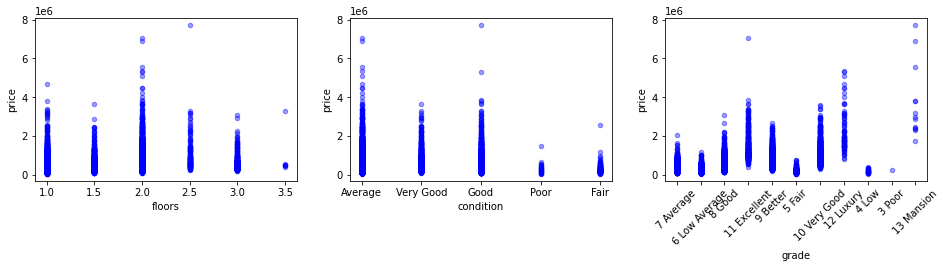

In [25]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

# Use for loop to loop through the three columns we want to see in the scatterplots below 
for col, ax in zip([ 'floors', 'condition', 'grade'], axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')
    plt.xticks(rotation = 45)

This further validates what we thought. The vertical lines suggest that we are working with categories. We already know that `condition` and `grade` are categorical variables that we may need to convert into numerical values so that our models can make sense of them. `floors` appears not to represent a continuous number, either, and may need to be treated as a category as well.

### Transforming Categorical Variables
***

We know when we need to transform a categorical variable for regression models, there are two approaches:
1) Perform label encoding<br>
2) Create dummy variables / one-hot-encoding

Label encoding consists of converting each value in a column to a number. This is one method for transforming a categorical variable into a numeric one so that our models can make sense of the values in the column. That being said, we will create dummy variables below. The advantage of this is that our numerical values cannot be misinterpreted as being continuous. We know one-hot-encoding is required when adding categorical variables in a regression model. One thing to be mindful of is the dummy variable trap where one variable can be predicted from all of this others. This would result in multicollinearity which is an issue in regression. We will avoid this trap by dropping one of the dummy variables by passing `drop_first = True` to our function `get_dummies()` from the `pandas` library.

In [26]:
# Look into floors

df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [27]:
# Look into condition 

df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [28]:
# Look into grade

df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

We now have a better idea of the values that we will transform into dummy variables. We will create a list below to go through our three columns of interest. By using `pd.get_dummies()`, from each original column, each category will be converted into a new column, assigning a 1 or 0 to each new column. 

In [29]:
# Create a list that we can pass through the pd.get_dummies() function 

cats = ['floors', 'condition', 'grade']

We will create a new dataframe with our dummy columns, rather than dropping the original columns and then concatenating the new dummy columns.

In [30]:
# Use pd.get_dummies() to create a new dataframe with the dummy columns 

df_dum = pd.get_dummies(data= df, columns= cats, drop_first = True)

In [31]:
# Check that this worked 

df_dum.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,5650,1180,0.0,1955,0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2170,400.0,1951,1991,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,770,0.0,1933,0,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1050,910.0,1965,0,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1680,0.0,1987,0,...,0,0,0,0,0,0,0,0,1,0


Looking at the column titles, thinking about our ultimate regression models, it may be wise to rename some of our columns now so that our linear regression models can read our data properly, and without error. Let's first look at our new column names and then rename them.

In [32]:
df_dum.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better'],
      dtype='object')

The spaces in our `grade` columns will likely pose issues. Additionally, the `.` in our `floors` columns may cause some trouble. Let's handle that now. 

In [33]:
# Remove space from column names and replace with _

df_dum.columns = [col.replace(' ', '_') for col in df_dum.columns]

In [34]:
# Remove . from column names and replace with _

df_dum.columns = [col.replace('.', '_') for col in df_dum.columns]

In [35]:
# Check that this worked 

df_dum.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
0,7129300520,221900.0,3,1.00,1180,5650,1180,0.0,1955,0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2170,400.0,1951,1991,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,770,0.0,1933,0,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1050,910.0,1965,0,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1680,0.0,1987,0,...,0,0,0,0,0,0,0,0,1,0


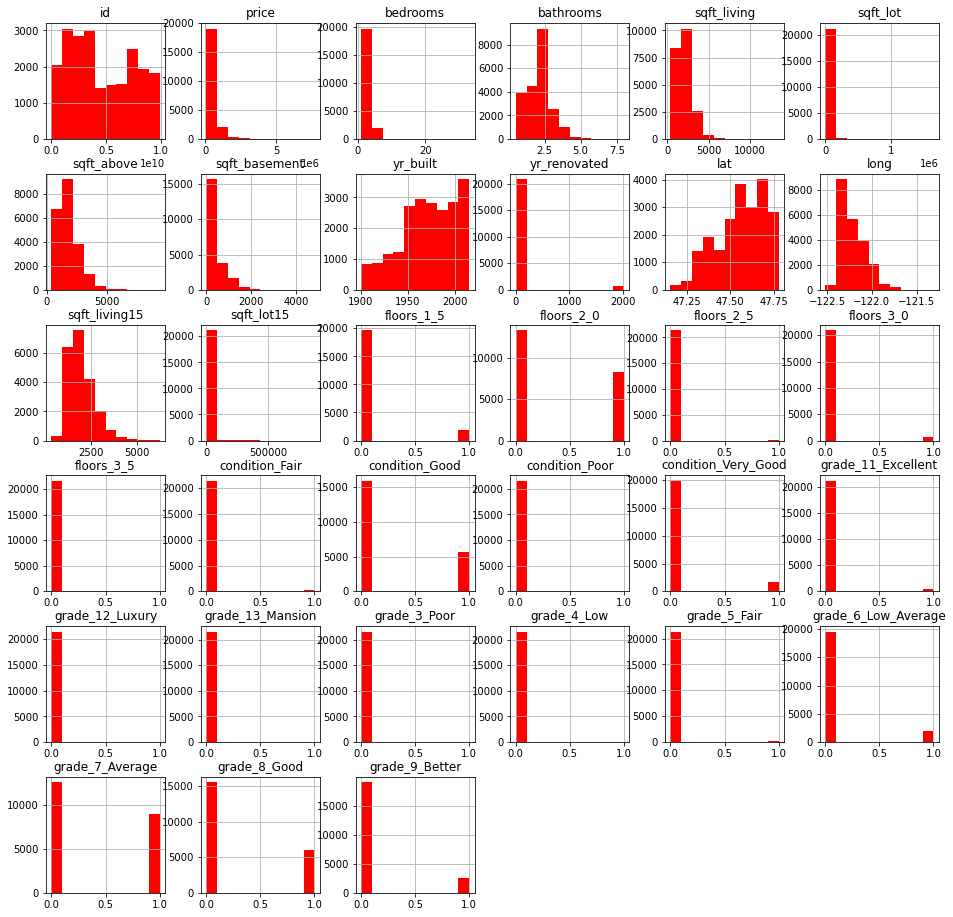

In [36]:
# Look at overview of histograms 

df_dum.hist(figsize=(16,16), color='r');

We can clearly see the dummy variables here, where many of our histograms are split between values of 0 and values of 1. We can be comfortable moving on from transforming categorical variables and begin to look into feature engineering.

### Feature Engineering, Scaling, and Normalization - Adjust title - 
***

// potentially discuss a bit more of the details and process here // 

For our continuous variables, we want our distributions to be as close to normal as possible. As we look at the histograms above, we can see that `bedroom`, `bathrooms`, and `sqft_living` may need to be scaled. Additionally, we are reminded that we have many columns that are not useful to us, that we may be able to drop. This includes `id`, `yr_built`, `yr_renovated`, `lat`, and `long`. We can do all of this below.

Before messing with anything, let's look into our columns a bit closer, starting with `bedrooms`. We know that one of the questions that we want to answer is how bedroom count impacts the sale price of a house. With this information, we may be able to suggest to homeowners if an investment in an extra bedroom, or even multiple, is worth the cost of the endeavor. All of that being said, we know this is an important variable for us. Let's look at the distribution below. 

##### Bedroom Distribution
***

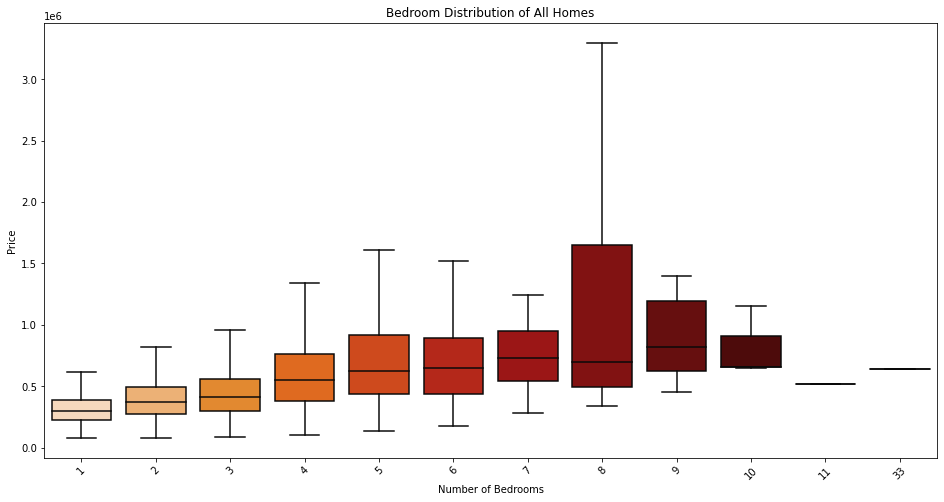

In [37]:
# Show distribution of bedrooms in a box plot 

# Create figure with matplotlib 
plt.figure(figsize=(16,8))

# Create box plot using seaborn that we imported at the beginning, remove outliers
sns.boxplot(x='bedrooms', y='price', data=df_dum, palette='gist_heat_r', showfliers = False)

# Create axis labels and organiztion
plt.title('Bedroom Distribution of All Homes')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Show distribution
plt.show()

This is helpful, and we can see a significant outlier at `33 bedrooms`. Additionally, the box plot shows us that we have our highest interquartile range (IQR) at 8 bedrooms. As a reminder, IQR measures the spread of our data, specifically the middle 50%. This shows us where the majority of our values lie, and this larger value indicates that the central portion of our data for 8 bedrooms is spread out further, relating to sale price. We removed outliers, but now know we have outliers in terms of sale price, most noticeably when there are 5 or 6 bedrooms. Let's look at all of this a bit closer below.

In [38]:
# Use value_counts() to look closer at our bedroom values 

valc = df_dum['bedrooms'].value_counts()
valc

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

This just tells us how many values we have for each bedroom count. We can see we only have 1 house listed with both 11 and 33 bedrooms, whereas we have nearly 10,000 homes listed with 3 bedrooms. Let's look at the same information in percentage form.

In [39]:
# Use valc variable from above to see the proportion of houses with each bedroom count

(valc/len(df_dum))*100

3     45.487799
4     31.865537
2     12.779553
5      7.413067
6      1.259434
1      0.907533
7      0.175950
8      0.060194
9      0.027782
10     0.013891
11     0.004630
33     0.004630
Name: bedrooms, dtype: float64

We can see that over 75% of our listings have 3 or 4 bedrooms. Although the quantity is helpful, we want to relate this to `price`. We can make a separate dataframe using only the top 100 sale prices of homes in King's County from our data. We will use the `sort_values()` function to sort our `price` column in `descending` order. We will then create a new dataframe called `top_100` that includes only the first `100` values in the dataframe that we just had sorted, thus including only the top 100 listings by `sale price`.

In [40]:
# Sort current dataframe and store in new variable top100

top100 = df_dum.sort_values(by=['price'], ascending=False)

In [41]:
# Check that this worked by checking the price column

top100['price'].head()

7245    7700000.0
3910    7060000.0
9245    6890000.0
4407    5570000.0
1446    5350000.0
Name: price, dtype: float64

In [42]:
# Adjust dataframe to only include first 100 values 

top100 = top100[0:100]

In [43]:
# Check that this worked by checking shape 

top100.shape

(100, 34)

Now that we have our new dataframe, we can look at the same `bedroom` value counts that we did before, now just looking at the listings with the top 100 sale prices. This may give us a better idea of how bedroom count and selling price are related.

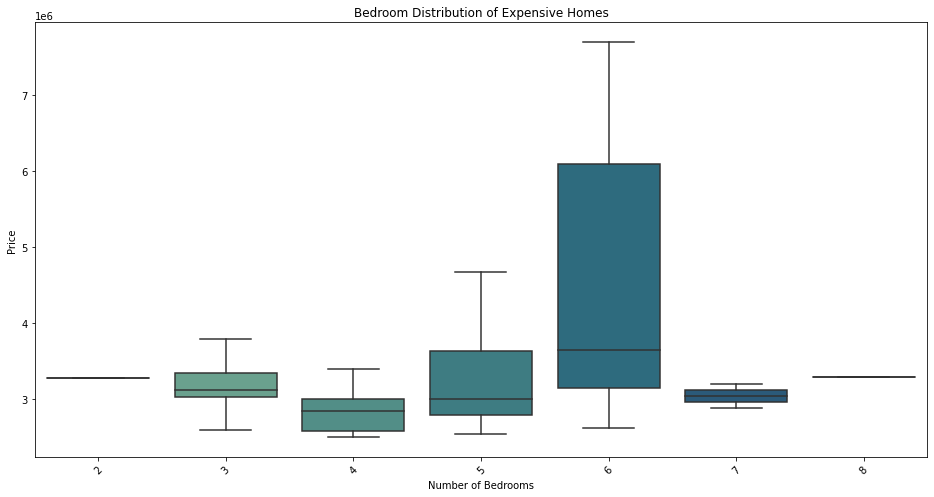

In [44]:
# Show distribution of bedrooms by top 100 selling price in a box plot 

# Create figure with matplotlib 
plt.figure(figsize=(16,8))

# Create box plot using seaborn that we imported at the beginning, remove outliers
sns.boxplot(x='bedrooms', y='price', data=top100, palette='crest', showfliers = False)

# Create axis labels and organiztion
plt.title('Bedroom Distribution of Expensive Homes')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Show distribution
plt.show()

This boxplot looks quite different from our prior one. Here, our highest IQR lies with 6 bedrooms. Our outliers seem to be significantly minimized, and homes with 5 bedrooms also appears to become more relevant to our discussion. Let's continue to look closer at the percentage, as we did before.

In [45]:
# Use value_counts() to look closer at our top 100 bedroom values by percentage

val100 = top100['bedrooms'].value_counts()
(val100/len(top100)) * 100

4    41.0
5    37.0
3    11.0
6     7.0
7     2.0
8     1.0
2     1.0
Name: bedrooms, dtype: float64

We see that the majority of homes that are in the top 100 of our data by price have 4 bedrooms, followed by 5 bedrooms. After these observations, we know that over 75% of all homes in King County have 3-4 bedrooms, and over 75% of the most expensive homes in King County have 4-5 bedrooms. Next, we can use these same steps to look into `bathrooms`.

##### Bathroom Distribution
***

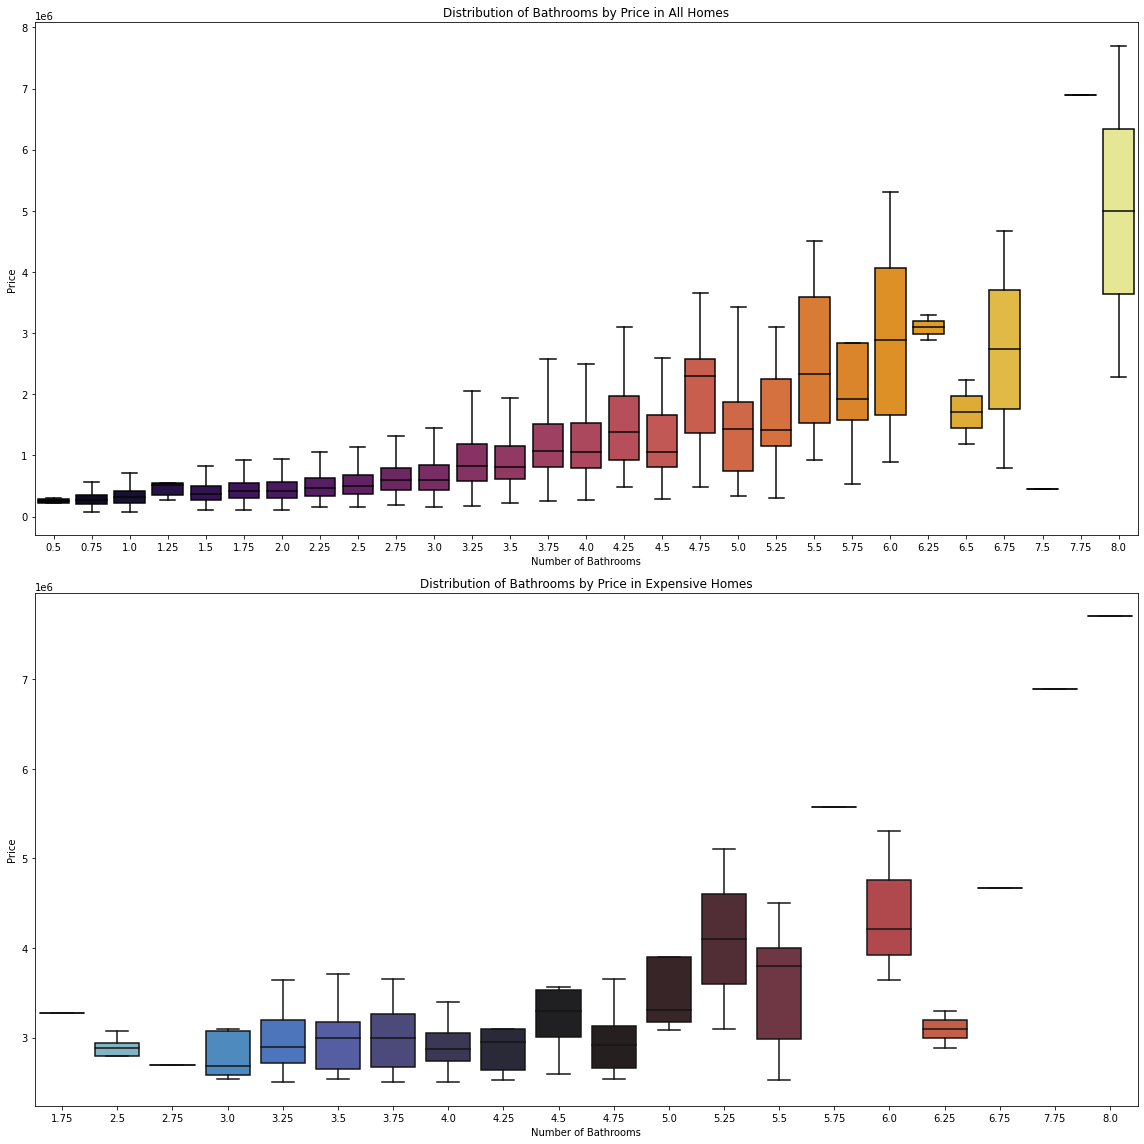

In [46]:
# Show distribution of bathrooms in box plot subplots, showing all the data and our top 100 data 

# Create figures with matplotlib 
fig, axes = plt.subplots(2, 1, figsize=(16,16))

# Create box plots using seaborn that we imported at the beginning, remove outliers
sns.boxplot(ax = axes[0], x='bathrooms', y='price', data=df_dum, palette='inferno', showfliers = False)
sns.boxplot(ax = axes[1], x='bathrooms', y='price', data=top100, palette='icefire', showfliers = False)

# Create titles, axes labels and organiztion for all homes
axes[0].set_title('Distribution of Bathrooms by Price in All Homes')
axes[0].set_xlabel('Number of Bathrooms')
axes[0].set_ylabel('Price')

# Create titles, axes labels and organiztion for top homes
axes[1].set_title('Distribution of Bathrooms by Price in Expensive Homes')
axes[1].set_xlabel('Number of Bathrooms')
axes[1].set_ylabel('Price')

# Set layout to avoid subplot overlap
plt.tight_layout()

# Show distribution
plt.show()

In [47]:
# Use value_counts() to see the proportion of houses with each bedroom count

val = df_dum['bathrooms'].value_counts()
(val/len(df_dum)) * 100

2.50    24.896976
1.00    17.831180
1.75    14.113071
2.25     9.478168
2.00     8.936426
1.50     6.690744
2.75     5.486873
3.00     3.486595
3.50     3.384729
3.25     2.727231
3.75     0.717692
4.00     0.629717
4.50     0.463027
4.25     0.365792
0.75     0.328749
4.75     0.106496
5.00     0.097236
5.25     0.060194
5.50     0.046303
1.25     0.041672
6.00     0.027782
5.75     0.018521
0.50     0.018521
8.00     0.009261
6.25     0.009261
6.75     0.009261
6.50     0.009261
7.50     0.004630
7.75     0.004630
Name: bathrooms, dtype: float64

In [48]:
# Use value_counts() to look closer at our top 100 bathroom values by percentage

val100 = top100['bathrooms'].value_counts()
(val100/len(top100)) * 100

3.25    16.0
4.00    12.0
3.00     9.0
3.50     9.0
4.25     9.0
4.75     7.0
4.50     6.0
3.75     6.0
5.50     5.0
2.50     4.0
5.00     4.0
6.00     3.0
6.25     2.0
5.25     2.0
5.75     1.0
7.75     1.0
2.75     1.0
6.75     1.0
1.75     1.0
8.00     1.0
Name: bathrooms, dtype: float64

We will want to look closer at this. But, for now, we know that about 78% of all homes in King County have between 1-2.5 bathrooms and about 60% of the most expensive homes in King County have between 3-4.5 bathrooms.

Before moving forward, let's take a closer look at our `grade`, `condition`, and `sqft_living` variables to get a better idea of what we are working with when it comes to our model. Let's also look at the distribution of `price`, our target variable.

##### Grade Distribution
***

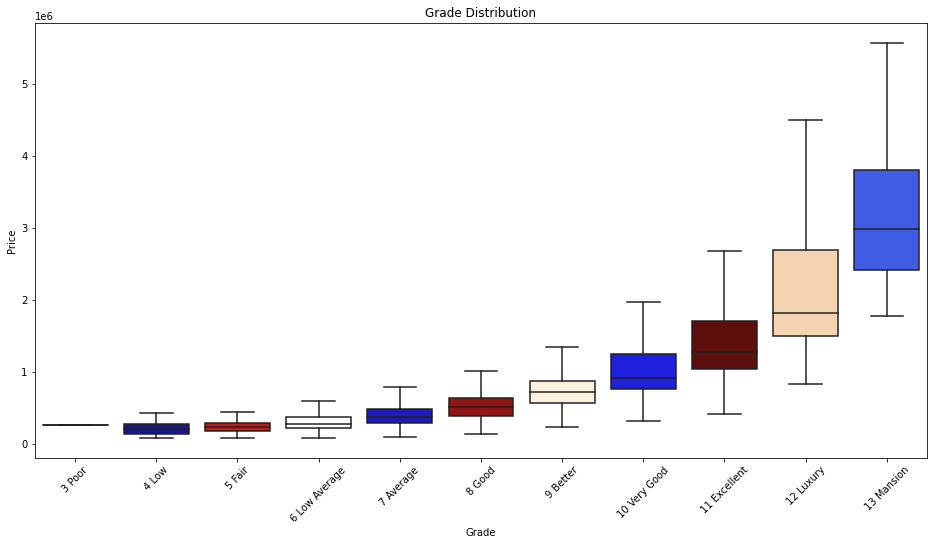

In [49]:
# Use original dataframe (before we added dummy variables) to glance at grade distribution 

# Create figure with matplotlib 
plt.figure(figsize=(16,8))

# Create box plot using seaborn that we imported at the beginning - remove outliers and order by hand 
sns.boxplot(x='grade', y='price', data=df, palette='flag', showfliers = False,
           order=['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
                 '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])

# Create axis labels and organiztion
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Show distribution
plt.show()

This helps us see the spread of `grade` in relation to `price`. We know that for our modeling, we will use a different dataframe that includes `dummy variables`, which separates out our `grade` column and created new binary columns for each grade label. That being said, looking at this plot, from our original dataframe, shows us that `grade` may be a very strong predictor of price. This will help us with the `r-squared` value of our models, and ultimately, may give us a strong recommendation for our homeowners in where to commit their renovation money. 

##### Condition Distribution
***

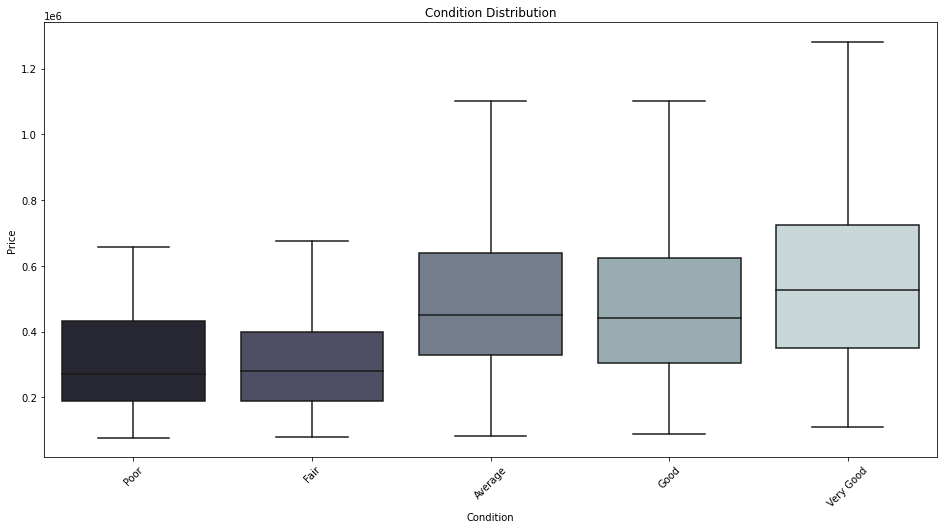

In [50]:
# Use original dataframe (before we added dummy variables) to glance at condition distribution 

# Create figure with matplotlib 
plt.figure(figsize=(16,8))

# Create box plot using seaborn that we imported at the beginning - remove outliers and order by hand 
sns.boxplot(x='condition', y='price', data=df, palette='bone', showfliers = False, 
            order=['Poor', 'Fair', 'Average', 'Good', 'Very Good'])

# Create axis labels and organiztion
plt.title('Condition Distribution')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Show distribution
plt.show()

Like our box and whisker plot for `grade`, this plot looking at the distribution of `condition` according to `price` is very helpful. We, again, see that `condition` may be a good and positive predictor of `price`.

##### Square Footage Distribution
***

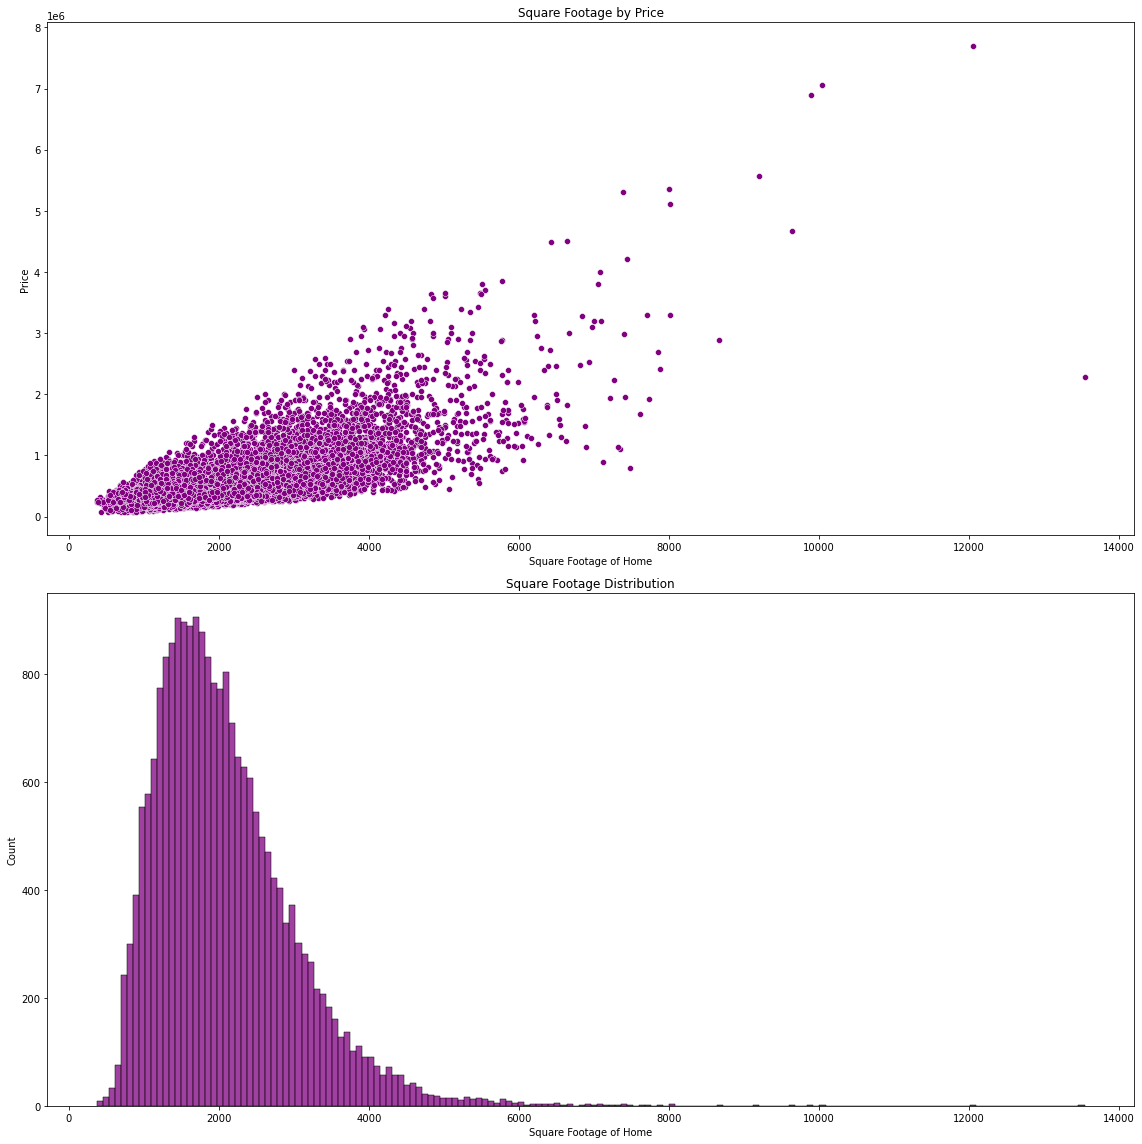

In [51]:
# Use current dataframe to glance at sqft_living distribution 

# Create subplots with matplotlib 
fig, axes = plt.subplots(2, 1, figsize=(16,16))

# Create scatterplot and histogram for our continuous variable using seaborn 
sns.scatterplot(ax = axes[0], x='sqft_living', y='price', data=df_dum, color='purple')
sns.histplot(ax = axes[1], x='sqft_living', data=df_dum, color='purple')

# Create titles, axes labels and organiztion for our scatterplot
axes[0].set_title('Square Footage by Price')
axes[0].set_xlabel('Square Footage of Home')
axes[0].set_ylabel('Price')

# Create titles, axes labels and organiztion for our histogram
axes[1].set_title('Square Footage Distribution')
axes[1].set_xlabel('Square Footage of Home')

# Set layout to avoid subplot overlap
plt.tight_layout()

# Show distribution
plt.show()

This is helpful. We clearly have a lot of data here but again see that this predictor looks to have a positive and potentially linear relationship with `price`. We also see that this variable looks to be skewed to the right, with outliers, so it may be a good idea to use a log transformation or method of normalization and feature scaling as we get closer to our modeling.

##### Price Distribution
***

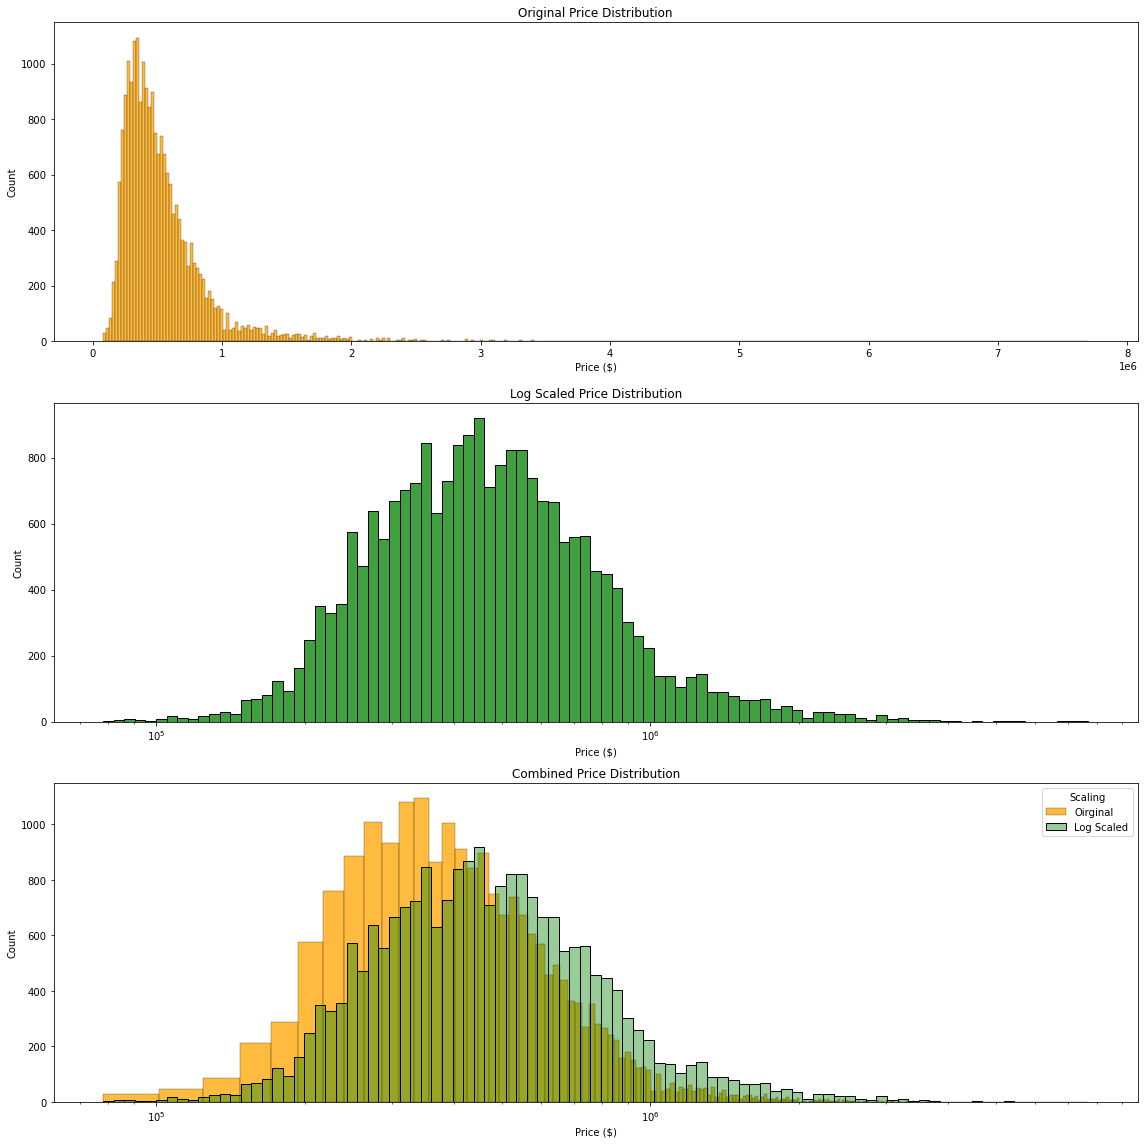

In [52]:
# Create regular histogram, log-scaled histogram, and a combined histogram to glance at price distribution

# Create subplots with matplotlib 
fig, axes = plt.subplots(3, 1, figsize=(16,16))

# Create histograms for our continuous variable using seaborn 
sns.histplot(ax = axes[0], x='price', data=df_dum, color='orange')
sns.histplot(ax = axes[1], x='price', data=df_dum, color='green', log_scale=True)
sns.histplot(ax = axes[2], x='price', data=df_dum, color='orange')
sns.histplot(ax = axes[2], x='price', data=df_dum, color='green', log_scale=True, alpha = .4)

# Create titles, axes labels and organiztion for our original histogram
axes[0].set_title('Original Price Distribution')
axes[0].set_xlabel('Price ($)')

# Create titles, axes labels and organiztion for our log scaled histogram
axes[1].set_title('Log Scaled Price Distribution')
axes[1].set_xlabel('Price ($)')

# Create titles, axes labels and organiztion for combined histogram
axes[2].set_title('Combined Price Distribution')
axes[2].set_xlabel('Price ($)')
axes[2].legend(title='Scaling', loc='upper right', labels=['Oirginal', 'Log Scaled'])

# Set layout to avoid subplot overlap
plt.tight_layout()

# Show distribution
plt.show()

Our first histogram showed us that our price data is pretty skewed, and we may want to use a log transformation below. We were able to use `seaborn` to get a visual for what this may look like in a plot, using the `log_scaled` condition and setting it to `True` with our second plot. Our third plot gives us a direct visual of how the two distributions line up against one another, and we can see the `log_scaled` transformation slightly normalizes the data for us which may be helpful with our modeling. We will work with all of this feature scaling once we get to our models.

## Linear Regression Assumptions
***

As we get closer to modeling, it is crucial for us to begin thinking about the linear regression assumptions. As we know, if some of these assumptions are not satisfied, we cannot trust and therefore not move forward with our results. The three main assumptions that we need to explore are:

**1. Linearity** <br>
**2. Homoescedasticity** <br>
**3. Normality**

We will also look into **multicollinearity** as we get into our modeling. For now, we will look into **linearity** and **multicollinearity**. We will dig deeper into the other assumptions once we have developed our final model, and need to check that we can be confident with it.

Now, we will check for **linearity**. This assumption requires that there is a linear relationship between the dependent variable (y) and our independent variables (x). These are also referred to us the response variable and predictors, respectively. We are looking to see that a change in Y is constant with a change in X. The best way to test this assumption is through scatterplots, or pairplots. Here, it is also important to keep an eye out for outliers, to eliminate a potential unwanted impact on the model. We will use pairplots below, where we are looking to see that a straight line fits the data. This is a preemptive look at the data, and again, once we develop our final model, we will check to make sure the linearity condition is met there. 

In [53]:
# Use seaborn to check for linearity with pairplots

# sns.pairplot(df_dum)

### Multicollinearity of Features
***

Multicollinearity is when multiple of our independent variables, or predictors, are correlated, rather than being independent of one another. As we know, this can create a significant issue for our models, if one predictor variable can be accurately linearly predicted by another. In short, rather than changing one predictor while keeping all other variables constant, we see that one predictor ends up being associated with the change in another. Ultimately, this makes our coefficients and p-values potentially less reliable. Below, we will look into this by creating a correlation matrix to explore the `.corr()` function, and see the pairwise correlations. We can then use `.stack()` and a subset to return only the highly correlated pairs. After that, we will create a heatmap using `seaborn` to visualize the correlation table.

In [54]:
# Create correlation matrix using .corr()

df_dum.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,-0.010799,-0.004359,0.021617,-0.010612,...,-0.019837,-0.015084,-0.003880,-0.005110,-0.002903,-0.025640,-0.015476,-0.015575,0.042285,0.009121
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.605368,0.321108,0.053953,0.117855,...,0.357589,0.291068,0.211806,-0.005155,-0.031618,-0.084549,-0.209463,-0.316053,0.004576,0.235859
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.479386,0.297229,0.155670,0.017900,...,0.116596,0.062257,0.039026,-0.017434,-0.068012,-0.113175,-0.239492,-0.104791,0.073140,0.160294
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.686668,0.278485,0.507173,0.047177,...,0.247293,0.159734,0.095118,-0.012087,-0.055599,-0.138740,-0.366185,-0.313457,0.189426,0.264756
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.876448,0.428660,0.318152,0.051060,...,0.345964,0.238136,0.144424,-0.011565,-0.053935,-0.127198,-0.312486,-0.358915,0.071115,0.318499
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,0.184139,0.015031,0.052946,0.004979,...,0.077104,0.061699,0.007767,-0.000348,0.000440,0.022931,-0.019116,-0.067791,-0.023923,0.049646
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,1.000000,-0.051175,0.424037,0.020645,...,0.342198,0.222177,0.126666,-0.010429,-0.047669,-0.108543,-0.280761,-0.387255,0.059423,0.343388
sqft_basement,-0.004359,0.321108,0.297229,0.278485,0.428660,0.015031,-0.051175,1.000000,-0.130085,0.065008,...,0.076299,0.079831,0.063423,-0.004421,-0.022388,-0.059784,-0.120907,-0.019855,0.035518,0.017906
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.424037,-0.130085,1.000000,-0.202555,...,0.098762,0.046874,0.004692,-0.011814,-0.041843,-0.128815,-0.313501,-0.211966,0.199844,0.220104
yr_renovated,-0.010612,0.117855,0.017900,0.047177,0.051060,0.004979,0.020645,0.065008,-0.202555,1.000000,...,-0.001403,-0.000269,0.016051,-0.001285,0.000445,-0.010451,0.002124,-0.017305,0.006465,0.016509


This will be incredibly helpful to look into, but for now we can narrow it down even further for ourselves. Now we can use `stack` to return only the highly correlated pairs, which we will define as over `.6`. Below, we will create a new dataframe that holds the absolute value of each correlation. We will use `stack` to stack the `row : column` pairs into a multindex, use `reset_index()` to set the multindex to separate columns, and then use `sort_values()` to order the values in `descending` order. We will then adjust the column names and index to make our new table more presentable.

In [55]:
# Create new dataframe called df_stack
stack_df = df_dum.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Use zip and list combine the variable name columns - Columns are named level_0 and level_1 by default
stack_df['pairs'] = list(zip(stack_df.level_0, stack_df.level_1))

# Set new 'pairs' column as index
stack_df.set_index(['pairs'], inplace = True)

# Drop old columns with level names 
stack_df.drop(columns=['level_1', 'level_0'], inplace = True)

# Change correlation column name from 0 to corr
stack_df.columns = ['corr']

# Drop duplicates - be mindful of perfect correlations we may be dropping
stack_df.drop_duplicates(inplace=True)

# Drop null values 
stack_df = stack_df.dropna()

In [56]:
# Return dataframe with correlation over .6 and less than 1

(stack_df[(stack_df['corr'] > .6) & (stack_df['corr'] < 1)])

,corr
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758
"(sqft_living15, sqft_above)",0.731767
"(sqft_lot15, sqft_lot)",0.718204
"(sqft_living, price)",0.701917
"(sqft_above, bathrooms)",0.686668
"(sqft_above, price)",0.605368


With the variables `sqft_living`, `sqft_above`, `sqft_living15`, `bathrooms`, `sqft_lot`, and `price`, we now know to keep these in mind as some of these are highly corrlated. We will likely remove a few of them to remove collinear features in our model. Looking at the columns, many of them have to do with square feet, so it is not odd to see that these variables are correlated. Now we can look into the heatmap.

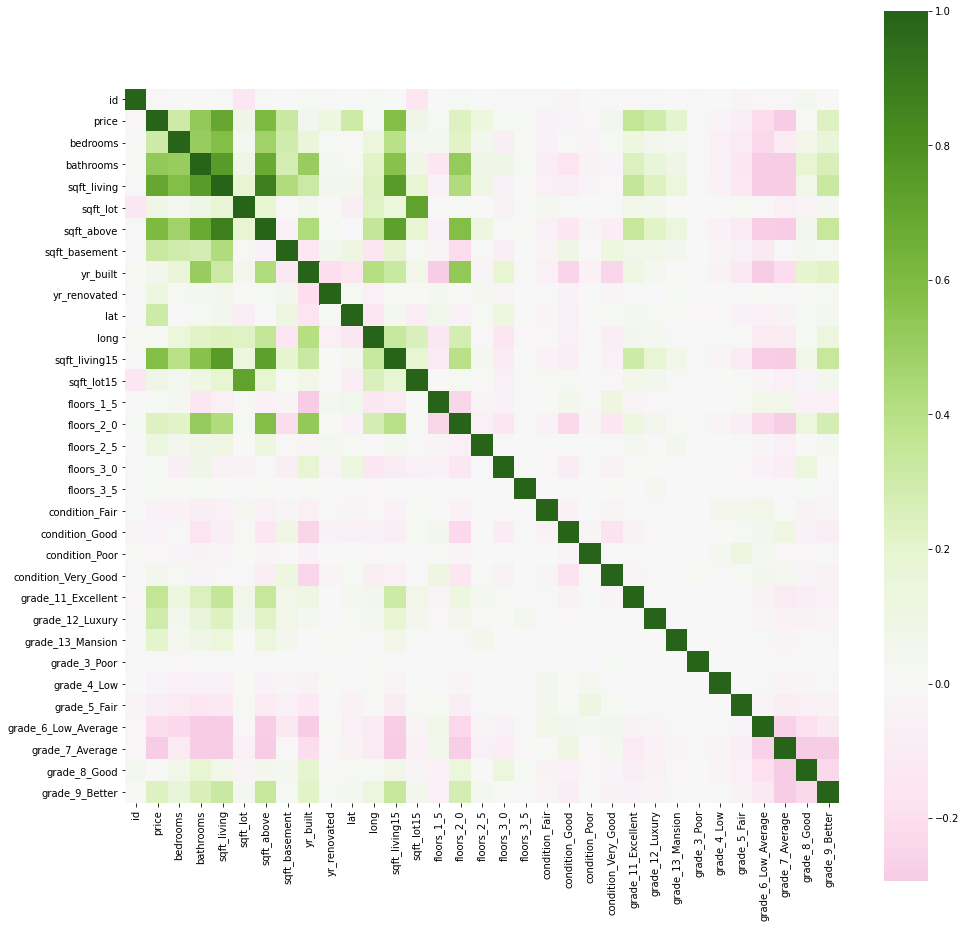

In [57]:
# Use seaborn to visualize heatmap 

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df_dum.corr(), center=0, cmap='PiYG', square=True, robust=True);

This reiterates what we know, and we see a small area of positive correlations revolving around `price`, `bedrooms`, `bathrooms`, and `sqft_living`. 

### Log Transformations and Feature Scaling
***

Before moving on, let's look at our continuous variables. With our model, we want to determine the optimal coefficients. If we transform our variables so that they have certain properties, including normality, we know that this will improve the predictive performance of our regression model. This will also help us with our final regression assumptions, and ultimately, allow us to make the most accurate predictions and recommendations when it comes to homeowner renovations. All of that being said, we may want to normalize and scale some of our continuous variables once we begin to develop our models. This may be through log transformations, standardization, or other methods. Looking at their distributions can help us decide where we may be able to improve our models

One option for transforming non-normal variable distributions is to apply a logarithmic function and observe its impact of the distribution. Log transformations can help reduce skewness and reduce variability of data. 

We will glance at the distributions below, but not make any concrete changes to our dataset. We know that when we use a `train-test split`, which we will discuss in more detail below, data preparation and transformations should happen after the split to avoid `data leakage`. We want to keep the test data as similar as possible so that we can accurately make predictions. 

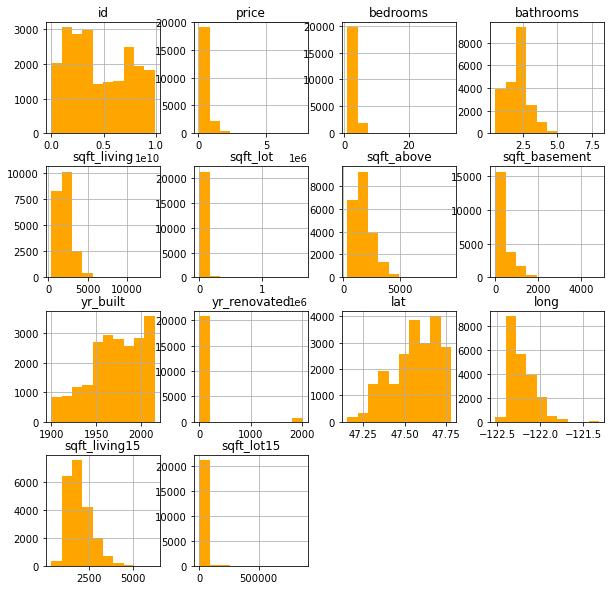

In [58]:
# Start by looking at the distributions of our continuous variables

# Create cont variable to store variables that are not objects and have more than 10 unique values 
cont = df_dum.loc[:, ((df_dum.dtypes != 'object') & (df.nunique() > 10))]

# Create histograms of these variables to see the distributions
cont.hist(figsize=(10,10), color='orange');

We have a couple of things to do from here. For starters, we are reminded that we do not need to use every column, and some of them do not make much sense in the context of our modeling anyway, like `id`. We are not using any location data so we can also remove `lat`, and `long`. `yr_renovated` is not helpful for us, nor `yr_built`. Let's drop these columns from our dataframe, and then continue with our continuous variables.

In [59]:
# Drop unwanted columns, clean up the dataframe 

df_dum = df_dum.drop(['id', 'lat', 'long', 'yr_renovated', 'yr_built'], axis=1)

In [60]:
# Check that this worked 

df_dum.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,...,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
0,221900.0,3,1.00,1180,5650,1180,0.0,98178,1340,5650,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2170,400.0,98125,1690,7639,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,770,0.0,98028,2720,8062,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1050,910.0,98136,1360,5000,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1680,0.0,98074,1800,7503,...,0,0,0,0,0,0,0,0,1,0


In [61]:
# Adjust cont variable for new changes 

cont = df_dum.loc[:, ((df_dum.dtypes != 'object') & (df.nunique() > 10))]

Now, looking at the distributions that we plotted above, we can use log transformations and see if that visually normalizes the data, as many of those histograms are skewed or non-normal. We already know that this looked like a promising solution with our `price` data, and hopefully that will hold true for some of our other variables.

We are also going to drop `sqft_basement` from our log transformations. We will work with how to handle this variable later, but for now, we remember that we replaced many of the `?` and other unknown values in this column with `0`. We do not want to use a log transformation here as we will get an error from our zero inflated variable. We cannot take the logarithm of zero.

In [62]:
# Drop sqft_basement column from cont variable 

cont = cont.drop('sqft_basement', axis=1)

In [63]:
# Check that this worked 

cont.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1180,1340,5650
1,538000.0,3,2.25,2570,7242,2170,1690,7639
2,180000.0,2,1.00,770,10000,770,2720,8062
3,604000.0,4,3.00,1960,5000,1050,1360,5000
4,510000.0,3,2.00,1680,8080,1680,1800,7503


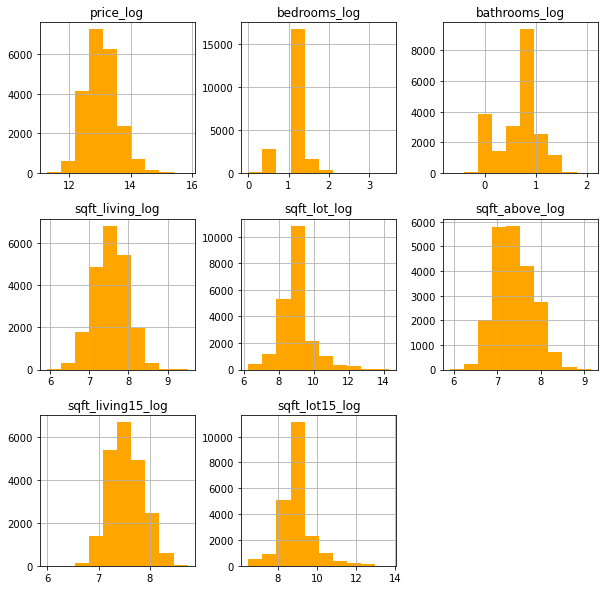

In [64]:
# Transforming non normal features

# Use for loop to create new column names, store under logs
logs = [f'{col}_log' for col in cont.columns]

# Use numpy to transform columns in our cont list to logs, store under logged
logged = np.log(cont)

# Apply column names to our logged variable 
logged.columns = logs

# Create histograms to see new distributions 
logged.hist(figsize = (10,10), color = 'Orange');

All of our transformations look more normal than they did before, except for `bedrooms_log` and `bathrooms_log`. This is really helpful information for us heading into our modeling, and we will definitely test a model that uses the log data for these variables, except for `bedrooms` and `bathrooms`. Right now, we can drop these columns from our list of continuous variables, and then drop their log transformations from our list of log transformed variables. After that, we can create a new dataframe that includes the new log transformations, combined with all of our data, to use later.

In [65]:
# Drop bathrooms and bedrooms from our list of continuous variables 
cont = cont.drop(['bathrooms', 'bedrooms'], axis=1)

# Drop bathrooms_log and bedrooms_log from our list of log transformed columns 
logged = logged.drop(['bathrooms_log', 'bedrooms_log'], axis=1)

In [94]:
# # Drop columns that we plan to replace with our log transformations & create new dataframe using pd.concat()

log_df = pd.concat([df_dum.drop(cont.columns, axis=1), logged],  axis=1)

In [95]:
# Check that this worked 

log_df.head()

,bedrooms,bathrooms,sqft_basement,zipcode,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,...,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,price_log,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_lot15_log
0,3,1.00,0.0,98178,0,0,0,0,0,0,...,0,1,0,0,12.309982,7.073270,8.639411,7.073270,7.200425,8.639411
1,3,2.25,400.0,98125,0,1,0,0,0,0,...,0,1,0,0,13.195614,7.851661,8.887653,7.682482,7.432484,8.941022
2,2,1.00,0.0,98028,0,0,0,0,0,0,...,1,0,0,0,12.100712,6.646391,9.210340,6.646391,7.908387,8.994917
3,4,3.00,910.0,98136,0,0,0,0,0,0,...,0,1,0,0,13.311329,7.580700,8.517193,6.956545,7.215240,8.517193
4,3,2.00,0.0,98074,0,0,0,0,0,0,...,0,0,1,0,13.142166,7.426549,8.997147,7.426549,7.495542,8.923058


This looks good. Now we can move onto modeling, and have already created a new dataframe that we can use.

## Modeling
***

Blurb here about what we are going to do 

### Baseline Model 
***

##### Train-Test Split
***

One of the first things we need to do here is perform a train-test split. As we know, to evaluate the model we will be comparing our predicted values with our actual values, the difference being the residuals. For our homeowners, we want to be able to **predict** which home renovations have the potential to make them the highest dollar amount, we do not just want to evaluate outdated information. The train-test split will help us get an idea of how well our model can perform with new data. Thus, with our split, a portion of our data will be used as a sample to `train` our model. This data will fit a linear regression, compute the parameter estimates, and finally, calculate our predictive performance by comparing the actual targets to those fitted by our model. 

In short, the training set will be used to build a model, and the model will be validated by the test set.


It is important that we randomly split the data to avoid overfitting. We also need to be mindful about the size of our split. In general, a training set size of 70-80% and test set size of 20-30% is acceptable. This is important because fitting a model to only a small portion of the data will likely lead to underfitting, while training a model on too much of the data will likely lead to overfitting. We can use the `train_test_split` function from `sklearn` to help split our data. Additionally, we will use `random_state` set to a number of our choosing within our function, for reproducibility of our results. 

In [68]:
# Import train_test_split from sklearn 

from sklearn.model_selection import train_test_split

In [96]:
# Let's rename our current dataframe to use in our models 

base_df = df_dum

In [98]:
# Create our independent and dependent variables

X = base_df.drop(['price'], axis=1)
y = base_df['price']

For our first model we will use a split of 75% train, 25% test ratio. We will print the length to see the actual size of our sets.

In [99]:
# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 2)

# Print the length of each split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


We can now feed our data into our Linear Model that we can import through `scikit-learn` via `LinearRegression` module. Using this, we can git a model to our data, using the training data to teach the model the patterns, and allow it to predict the price of a home. 

In [100]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Use linreg to create linear regression object
linreg = LinearRegression()

# Fit object to training data 
linreg.fit(X_train, y_train)

# Use linreg.predict to create predictions on the train and test data and assign to new variables
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Next, we can look into `residuals` and calculate the `mean squared error (MSE)` for our training and test sets. As we know, our residuals are the difference between our predicted values (𝑦̂), with our actual values (𝑦). In other words, the difference between the observed value of our response variable and that of the predicted variable:

$r_{i} = y_{i} - \hat y_{i}$ 

As a summary metric to compare the residuals of our models, we can measure all of the points in our train and test set using the `MSE`. A higher MSE indicates a worse model fit. We also know if our model has a higher MSE for our training set in comparison to that of our test set, then our model is overfitting, meaning it is not generalizable and will not hold to future cases. If both training and test sets have a high MSE, then we have the opposite issue of underfitting by being *too* generalizable. 

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$
***

In [101]:
# Create variables for train test residuals

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [102]:
# Print these values 

print(train_residuals)
print(test_residuals)

5197     114295.288302
19790    398631.892003
5275    -149024.481312
15317    103448.187353
18485     16279.091135
             ...      
1099     132699.060999
18898    110971.021264
11798     40254.545159
6637    -150373.347896
2575     212239.174815
Name: price, Length: 16197, dtype: float64
570      -10936.912135
19700    135928.059968
13482   -138555.862246
11504    119862.947297
18868     39132.051622
             ...      
17367    140688.824484
5136      58266.422021
14566   -316540.948241
7628      -7701.222125
2652    -148070.752257
Name: price, Length: 5400, dtype: float64


We can compute the MSE directly with the `mean_squared_error()` function in `sklearn`.

In [103]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Apply function to training and test sets 
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

# Print results
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 50461340430.73413
Test Mean Squared Error: 53796086894.96503


There is not a massive difference between the train and test MSE which is what we were looking for, but our error is quite high. Our train set error is smaller than our test set error, so our validation process indicates that we may be slightly overfitting. As we know, an overfit model is not generalizable and will not hold to future cases, so we need to be mindful of this. We can explore different split sizes below a bit.

We can iterate over a range of split sizes below. We can do this by generating a new train test split sample and preprocessing each set. Then, we can fit a model to the training sample and calculate the training error as well as the test error for each split. Then we can plot the training error versus training size as well as the test error versus training size on a plot.

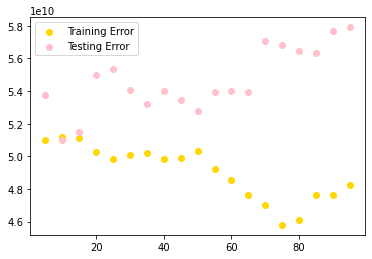

In [104]:
# Create empty MSE lists 
train_mse = []
test_mse = []

# Create the range of splits and assign to t_sizes
t_sizes = list(range(5,100,5))

# Create for loop to iterate through splits in our list 
for t_size in t_sizes:
    
    # Create new split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100, random_state=42)

    # Fit model
    linreg.fit(X_train, y_train)

    # Append metrics to their respective lists
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_hat_train))
    test_mse.append(mean_squared_error(y_test, y_hat_test))

# Create figure for plot
fig, ax = plt.subplots()

# Create scatterplots
ax.scatter(t_sizes, train_mse, label='Training Error', color='Gold')
ax.scatter(t_sizes, test_mse, label='Testing Error', color='Pink')
ax.legend();

Below we will basically repeat what we did above, except for each split size we will create 10 iterations of models and errors. From this, we will look at the average error. This can help us pick out any models that may stand our in high or low quality due to good or bad splits.

{}% Train {}% Test Ratio
Train Mean Squared_Error: 51157067035.84034
Test Mean Squared_Error: 51151911438.8977 

{}% Train {}% Test Ratio
Train Mean Squared_Error: 49910319706.316864
Test Mean Squared_Error: 63549700722.4068 

{}% Train {}% Test Ratio
Train Mean Squared_Error: 50165323441.73172
Test Mean Squared_Error: 57551740033.91856 

{}% Train {}% Test Ratio
Train Mean Squared_Error: 49837838592.01658
Test Mean Squared_Error: 57086150962.15373 

{}% Train {}% Test Ratio
Train Mean Squared_Error: 50467929597.634254
Test Mean Squared_Error: 53680004484.78253 

{}% Train {}% Test Ratio
Train Mean Squared_Error: 49713693966.86988
Test Mean Squared_Error: 54724934546.96758 

{}% Train {}% Test Ratio
Train Mean Squared_Error: 49967051525.60046
Test Mean Squared_Error: 53577660273.790695 

{}% Train {}% Test Ratio
Train Mean Squared_Error: 49935119328.0802
Test Mean Squared_Error: 53220216312.79701 

{}% Train {}% Test Ratio
Train Mean Squared_Error: 49636482599.927574
Test Mean Squared_

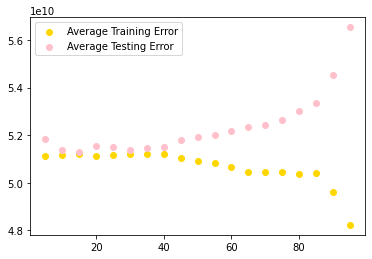

In [106]:
# Create empty MSE lists
train_mse = []
test_mse = []

# Create the range of splits and assign to t_sizes
t_sizes = list(range(5,100,5))

# Create for loop to iterate through splits in our list 
for t_size in t_sizes:
    
    inner_train_mse = []
    inner_test_mse = []
    for i in range(100):
        
        # Create new split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100, random_state=i)
        
        # Fit model
        linreg.fit(X_train, y_train)

        # Append metrics to their respective lists
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        inner_train_mse.append(mean_squared_error(y_train, y_hat_train))
        inner_test_mse.append(mean_squared_error(y_test, y_hat_test))

    train_mse.append(np.mean(inner_train_mse))
    test_mse.append(np.mean(inner_test_mse))
    
#     print('{}% Train {}% Test Ratio'.format(round((1 - abs(t_size/100)),2),round((t_size/100),2))
#     print('Train Mean Squared_Error:',mean_squared_error(y_train, y_hat_train))
#     print('Test Mean Squared_Error:',mean_squared_error(y_test, y_hat_test),'\n')

    
# Create figure for plot
fig, ax = plt.subplots()

# Create scatterplots
ax.scatter(t_sizes, train_mse, label='Average Training Error', color='Gold')
ax.scatter(t_sizes, test_mse, label='Average Testing Error', color='Pink')
ax.legend();

**Reflect on results here and then best split**

#### Linear Regression Using StatsModels

Visualized, look into p-values and r-squared values. Use statsmodels and OLS module

Use `statsmodels.api` to run OLS on data
***

In [77]:
# Import libraries from statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols

We can seperate out the outcome variable 'price' out of `final_df`, and use the a `'+'.join()` command on the predictors to make this more simple.

In [107]:
# Use price as dependent variable 
outcome = 'price'

# Use columns except for price as independent variables
predictors = base_df.drop('price', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

In [108]:
# Create our fitted linear regression model

model = ols(formula=formula, data=base_df).fit()

In [109]:
# Get regression diagnostics summary 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     851.8
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:06:05   Log-Likelihood:            -2.9044e+05
No. Observations:               21597   AIC:                         5.811e+05
Df Residuals:                   21500   BIC:                         5.819e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.358e+05   1.44e+04      9.406      0.000    1.08e+05    1.64e+05
zipcode[T.98002]     1.313e+04   1.49e+04      0.881      0.378   -1.61e+04    4.23e+04
zipcode[T.98003]    -2068.9428   1.34e+04     -0.154      0.877   -2.83e+04    2.42e+04
zipcode[T.98004]     7.508e+05   1.31e+04     57.238      0.000    7.25e+05    7.77e+05
zipcode[T.98005]     2.791e+05   1.59e+04     17.606      0.000    2.48e+05     3.1e+05
zipcode[T.98006]     2.426e+05   1.19e+04     20.409      0.000    2.19e+05    2.66e+05
zipcode[T.98007]     2.438e+05   1.67e+04     14.561      0.000    2.11e+05    2.77e+05
zipcode[T.98008]     2.973e+05   1.34e+04     22.172      0.000    2.71e+05    3.24e+05
zipcode[T.98010]     5.382e+04   1.91e+04      2.820      0.005    1.64e+04    9.12e+04
zipcode[T.98011]     1.234e+05    1.5e+04      8.247      0.000    9.41e+04    1.53e+05
zipcode[T.98014]     8.998e+04   1.78e+04      5.048      0.000     5.5e+04    1.25e+05
zipcode[T.98019]     8.782e+04   1.52e+04      5.797      0.000    5.81e+04    1.18e+05
zipcode[T.98022]     1.663e+04   1.43e+04      1.162      0.245   -1.14e+04    4.47e+04
zipcode[T.98023]    -2.857e+04   1.16e+04     -2.455      0.014   -5.14e+04   -5757.448
zipcode[T.98024]     1.551e+05    2.1e+04      7.371      0.000    1.14e+05    1.96e+05
zipcode[T.98027]     1.476e+05   1.22e+04     12.074      0.000    1.24e+05    1.72e+05
zipcode[T.98028]     1.316e+05   1.34e+04      9.848      0.000    1.05e+05    1.58e+05
zipcode[T.98029]     2.084e+05    1.3e+04     15.994      0.000    1.83e+05    2.34e+05
zipcode[T.98030]     2787.6289   1.37e+04      0.203      0.839   -2.41e+04    2.97e+04
zipcode[T.98031]     1.048e+04   1.35e+04      0.777      0.437    -1.6e+04    3.69e+04
zipcode[T.98032]     6211.3084   1.75e+04      0.355      0.722    -2.8e+04    4.05e+04
zipcode[T.98033]     3.627e+05    1.2e+04     30.131      0.000    3.39e+05    3.86e+05
zipcode[T.98034]     2.093e+05   1.14e+04     18.318      0.000    1.87e+05    2.32e+05
zipcode[T.98038]     2.761e+04   1.13e+04      2.445      0.014    5474.169    4.97e+04
zipcode[T.98039]     1.214e+06   2.57e+04     47.337      0.000    1.16e+06    1.26e+06
zipcode[T.98040]     5.301e+05   1.36e+04     38.840      0.000    5.03e+05    5.57e+05
zipcode[T.98042]      -48.1496   1.14e+04     -0.004      0.997   -2.24e+04    2.23e+04
zipcode[T.98045]     1.002e+05   1.44e+04      6.945      0.000    7.19e+04    1.28e+05
zipcode[T.98052]     2.272e+05   1.14e+04     19.991      0.000    2.05e+05     2.5e+05
zipcode[T.98053]     1.843e+05   1.23e+04     14.948      0.000     1.6e+05    2.08e+05
zipcode[T.98055]     4.564e+04   1.36e+04      3.367      0.001    1.91e+04    7.22e+04
zipcode[T.98056]     9.346e+04   1.22e+04      7.659      0.000    6.95e+04    1.17e+05
zip

#### Model Adjustments

We have created our baseline model and our r-squared value is actually higher than we anticipated, at **.792**. That being said, not all of our features have p-values that are below our alpha so we definitely want to adjust for that in our next model. We will make a new dataframe that removes these. We also will remove the `zipcode` data, as this does not help with our renovation goal, and see how that impacts our model.

In [111]:
# Remove variables with p-values that are above alpha

df_2 = base_df.drop(['zipcode', 'floors_1_5', 'floors_3_5', 'grade_3_Poor', 'condition_Fair',
                    'sqft_basement'], axis=1)

In [112]:
# Check this worked 

df_2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,floors_2_0,floors_2_5,...,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
0,221900.0,3,1.00,1180,5650,1180,1340,5650,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2170,1690,7639,1,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,770,2720,8062,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1050,1360,5000,0,0,...,1,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1680,1800,7503,0,0,...,0,0,0,0,0,0,0,0,1,0


In [113]:
# Adjust and run new model 

# Use price as dependent variable 
outcome = 'price'

# Use columns except for price as independent variables
predictors = df_2.drop('price', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

In [114]:
# Create our fitted linear regression model

model = ols(formula=formula, data=df_2).fit()

In [115]:
# Get regression diagnostics summary 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1544.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:09:38   Log-Likelihood:            -2.9718e+05
No. Observations:               21597   AIC:                         5.944e+05
Df Residuals:                   21574   BIC:                         5.946e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.461e+05   1.45e+04     37.623      0.000    5.18e+05    5.75e+05
bedrooms            -2.806e+04   2194.953    -12.785      0.000   -3.24e+04   -2.38e+04
bathrooms            8067.6110   3583.320      2.251      0.024    1044.039    1.51e+04
sqft_living           206.7356      4.830     42.799      0.000     197.268     216.204
sqft_lot                0.0089      0.054      0.164      0.870      -0.098       0.116
sqft_above            -61.9343      4.839    -12.799      0.000     -71.419     -52.450
sqft_living15          33.9366      3.828      8.865      0.000      26.433      41.440
sqft_lot15             -0.7379      0.083     -8.884      0.000      -0.901      -0.575
floors_2_0          -3.697e+04   4785.976     -7.726      0.000   -4.64e+04   -2.76e+04
floors_2_5            1.67e+05   1.86e+04      8.960      0.000     1.3e+05    2.04e+05
floors_3_0            6.68e+04   1.04e+04      6.404      0.000    4.64e+04    8.72e+04
condition_Good       4.883e+04   3801.797     12.844      0.000    4.14e+04    5.63e+04
condition_Poor       4.447e+04   4.29e+04      1.036      0.300   -3.97e+04    1.29e+05
condition_Very_Good  1.264e+05   6067.768     20.837      0.000    1.15e+05    1.38e+05
grade_11_Excellent   2.813e+05   1.36e+04     20.626      0.000    2.55e+05    3.08e+05
grade_12_Luxury      8.044e+05    2.6e+04     30.959      0.000    7.53e+05    8.55e+05
grade_13_Mansion     1.947e+06   6.52e+04     29.860      0.000    1.82e+06    2.08e+06
grade_4_Low         -4.566e+05   4.55e+04    -10.043      0.000   -5.46e+05   -3.67e+05
grade_5_Fair        -4.555e+05   1.82e+04    -24.985      0.000   -4.91e+05    -4.2e+05
grade_6_Low_Average -4.292e+05   1.15e+04    -37.286      0.000   -4.52e+05   -4.07e+05
grade_7_Average     -3.983e+05   9590.838    -41.534      0.000   -4.17e+05    -3.8e+05
grade_8_Good        -3.291e+05   8653.168    -38.033      0.000   -3.46e+05   -3.12e+05
grade_9_Better      -1.908e+05   8422.861    -22.657      0.000   -2.07e+05   -1.74e+05
==============================================================================
Omnibus:                    13980.957   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           537175.065
Skew:                           2.568   Prob(JB):                         0.00
Kurtosis:                      26.886   Cond. No.                     2.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our `r-squared` is significantly lower at **.612**, but also more accurate for our data. Our kurtosis decreased dramatically, as well. We now have two more features whose `p-values` are above our alpha, with `condition_Poor` and `sqft_lot`. Let's repeat the process and remove these two variables. 

In [116]:
# Remove variables with p-values that are above alpha

df_3 = df_2.drop(['condition_Poor', 'sqft_lot'], axis=1)

In [117]:
# Adjust and run new model 

# Use price as dependent variable 
outcome = 'price'

# Use columns except for price as independent variables
predictors = df_3.drop('price', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

In [118]:
# Create our fitted linear regression model

model = ols(formula=formula, data=df_3).fit()

In [119]:
# Get regression diagnostics summary 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1698.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:10:48   Log-Likelihood:            -2.9718e+05
No. Observations:               21597   AIC:                         5.944e+05
Df Residuals:                   21576   BIC:                         5.946e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             5.46e+05   1.45e+04     37.623      0.000    5.18e+05    5.74e+05
bedrooms            -2.808e+04   2194.297    -12.798      0.000   -3.24e+04   -2.38e+04
bathrooms            8031.5427   3582.955      2.242      0.025    1008.686    1.51e+04
sqft_living           206.7419      4.830     42.806      0.000     197.275     216.209
sqft_above            -61.8937      4.833    -12.807      0.000     -71.367     -52.421
sqft_living15          34.0154      3.822      8.901      0.000      26.525      41.506
sqft_lot15             -0.7288      0.059    -12.296      0.000      -0.845      -0.613
floors_2_0          -3.705e+04   4781.281     -7.749      0.000   -4.64e+04   -2.77e+04
floors_2_5            1.67e+05   1.86e+04      8.959      0.000     1.3e+05    2.03e+05
floors_3_0           6.675e+04   1.04e+04      6.400      0.000    4.63e+04    8.72e+04
condition_Good        4.87e+04   3799.462     12.816      0.000    4.12e+04    5.61e+04
condition_Very_Good  1.263e+05   6066.158     20.819      0.000    1.14e+05    1.38e+05
grade_11_Excellent   2.813e+05   1.36e+04     20.625      0.000    2.55e+05    3.08e+05
grade_12_Luxury      8.044e+05    2.6e+04     30.959      0.000    7.53e+05    8.55e+05
grade_13_Mansion     1.947e+06   6.52e+04     29.862      0.000    1.82e+06    2.07e+06
grade_4_Low         -4.549e+05   4.54e+04    -10.013      0.000   -5.44e+05   -3.66e+05
grade_5_Fair        -4.538e+05   1.82e+04    -24.996      0.000   -4.89e+05   -4.18e+05
grade_6_Low_Average -4.289e+05   1.15e+04    -37.275      0.000   -4.51e+05   -4.06e+05
grade_7_Average     -3.982e+05   9589.087    -41.531      0.000   -4.17e+05   -3.79e+05
grade_8_Good         -3.29e+05   8652.251    -38.029      0.000   -3.46e+05   -3.12e+05
grade_9_Better      -1.908e+05   8422.110    -22.657      0.000   -2.07e+05   -1.74e+05
==============================================================================
Omnibus:                    13981.465   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           537069.271
Skew:                           2.568   Prob(JB):                         0.00
Kurtosis:                      26.884   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Even though we have an identical `r-squared` value, we no longer have any `p-values` that are above our alpha threshold.

This is a great start, but we know that our model needs to pass our linear regression assumptions, and the shape of our distributions suggested that transforming our continuous variables, including our dependent variable of `price`, to `logs`, may be beneficial and improve our model. Let's apply those changes below, and see how our new model performs.

#### Log Transformation

We already created a new dataframe for this, but before using `log_df`, let's only change our dependent variable, `price`, and see how our model performs. We can create a new dataframe for this below. 

In [122]:
# Create df_4 with price_log

df_4 = df_3
df_4['price_log'] = np.log(df_3['price'])

In [125]:
# Drop price column from df_4

df_4 = df_4.drop(['price'], axis=1) 

In [126]:
# Check that this worked 

df_4.head()

,bedrooms,bathrooms,sqft_living,sqft_above,sqft_living15,sqft_lot15,floors_2_0,floors_2_5,floors_3_0,condition_Good,...,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,price_log
0,3,1.00,1180,1180,1340,5650,0,0,0,0,...,0,0,0,0,0,0,1,0,0,12.309982
1,3,2.25,2570,2170,1690,7639,1,0,0,0,...,0,0,0,0,0,0,1,0,0,13.195614
2,2,1.00,770,770,2720,8062,0,0,0,0,...,0,0,0,0,0,1,0,0,0,12.100712
3,4,3.00,1960,1050,1360,5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,13.311329
4,3,2.00,1680,1680,1800,7503,0,0,0,0,...,0,0,0,0,0,0,0,1,0,13.142166


In [127]:
# Create our independent and dependent variables with log transformed price column

X = df_4.drop(['price_log'], axis=1)
y = df_4['price_log']

In [128]:
# Run new model

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price as independent variables
predictors = df_4.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

In [129]:
# Create our fitted linear regression model

model = ols(formula=formula, data=df_4).fit()

In [130]:
# Get regression diagnostics summary 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1541.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:38:42   Log-Likelihood:                -7212.9
No. Observations:               21597   AIC:                         1.447e+04
Df Residuals:                   21576   BIC:                         1.464e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.9694      0.021    605.494      0.000      12.927      13.011
bedrooms               -0.0272      0.003     -8.407      0.000      -0.034      -0.021
bathrooms               0.0034      0.005      0.648      0.517      -0.007       0.014
sqft_living             0.0003   7.13e-06     38.017      0.000       0.000       0.000
sqft_above             -0.0001   7.13e-06    -14.571      0.000      -0.000   -8.99e-05
sqft_living15           0.0001   5.64e-06     18.049      0.000    9.07e-05       0.000
sqft_lot15          -6.215e-07   8.75e-08     -7.105      0.000   -7.93e-07    -4.5e-07
floors_2_0             -0.0313      0.007     -4.438      0.000      -0.045      -0.017
floors_2_5              0.1725      0.028      6.273      0.000       0.119       0.226
floors_3_0              0.1433      0.015      9.309      0.000       0.113       0.173
condition_Good          0.0740      0.006     13.206      0.000       0.063       0.085
condition_Very_Good     0.2107      0.009     23.538      0.000       0.193       0.228
grade_11_Excellent      0.1277      0.020      6.347      0.000       0.088       0.167
grade_12_Luxury         0.2643      0.038      6.893      0.000       0.189       0.339
grade_13_Mansion        0.3515      0.096      3.653      0.000       0.163       0.540
grade_4_Low            -1.0542      0.067    -15.724      0.000      -1.186      -0.923
grade_5_Fair           -0.9387      0.027    -35.038      0.000      -0.991      -0.886
grade_6_Low_Average    -0.7529      0.017    -44.339      0.000      -0.786      -0.720
grade_7_Average        -0.5642      0.014    -39.867      0.000      -0.592      -0.536
grade_8_Good           -0.3735      0.013    -29.250      0.000      -0.399      -0.348
grade_9_Better         -0.1625      0.012    -13.074      0.000      -0.187      -0.138
==============================================================================
Omnibus:                       15.232   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.270
Skew:                           0.065   Prob(JB):                     0.000483
Kurtosis:                       2.987   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model has a lower `r-squared` value than our previous models. We know this model has all of the `p-value` adjustments that we have made thus far, and now has the dependent variable with its log transformation. We can also see that `bathrooms`, is above the `p-value` threshold. This feature is important to us, and we can consider creating a dummy variable later. Before moving forward, let's look at the impact if we transformed all of our continuous variables to `logs`.

In [131]:
# Create our independent and dependent variables with log transformed continuous variables 
X = log_df.drop(['price_log'], axis=1)
y = log_df['price_log']

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = log_df.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

In [132]:
# Create our fitted linear regression model

model = ols(formula=formula, data=log_df).fit()

In [133]:
# Get regression diagnostics summary 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1478.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:44:09   Log-Likelihood:                 5107.4
No. Observations:               21597   AIC:                        -1.002e+04
Df Residuals:                   21500   BIC:                            -9247.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.6423      0.063    121.505      0.000       7.519       7.766
zipcode[T.98002]        0.0068      0.017      0.401      0.688      -0.027       0.040
zipcode[T.98003]        0.0258      0.015      1.688      0.091      -0.004       0.056
zipcode[T.98004]        1.1143      0.015     74.438      0.000       1.085       1.144
zipcode[T.98005]        0.6998      0.018     38.738      0.000       0.664       0.735
zipcode[T.98006]        0.6418      0.014     47.410      0.000       0.615       0.668
zipcode[T.98007]        0.6452      0.019     33.792      0.000       0.608       0.683
zipcode[T.98008]        0.6933      0.015     45.313      0.000       0.663       0.723
zipcode[T.98010]        0.2260      0.022     10.385      0.000       0.183       0.269
zipcode[T.98011]        0.4339      0.017     25.424      0.000       0.400       0.467
zipcode[T.98014]        0.2866      0.020     14.182      0.000       0.247       0.326
zipcode[T.98019]        0.3025      0.017     17.545      0.000       0.269       0.336
zipcode[T.98022]        0.0698      0.016      4.301      0.000       0.038       0.102
zipcode[T.98023]       -0.0206      0.013     -1.550      0.121      -0.047       0.005
zipcode[T.98024]        0.4151      0.024     17.362      0.000       0.368       0.462
zipcode[T.98027]        0.4943      0.014     35.545      0.000       0.467       0.522
zipcode[T.98028]        0.4167      0.015     27.353      0.000       0.387       0.447
zipcode[T.98029]        0.5931      0.015     39.802      0.000       0.564       0.622
zipcode[T.98030]        0.0459      0.016      2.928      0.003       0.015       0.077
zipcode[T.98031]        0.0677      0.015      4.399      0.000       0.038       0.098
zipcode[T.98032]       -0.0098      0.020     -0.492      0.623      -0.049       0.029
zipcode[T.98033]        0.7927      0.014     57.691      0.000       0.766       0.820
zipcode[T.98034]        0.5572      0.013     42.737      0.000       0.532       0.583
zipcode[T.98038]        0.1572      0.013     12.230      0.000       0.132       0.182
zipcode[T.98039]        1.2785      0.029     43.745      0.000       1.221       1.336
zipcode[T.98040]        0.9005      0.016     57.849      0.000       0.870       0.931
zipcode[T.98042]        0.0582      0.013      4.474      0.000       0.033       0.084
zipcode[T.98045]        0.3206      0.016     19.469      0.000       0.288       0.353
zipcode[T.98052]        0.6248      0.013     48.171      0.000       0.599       0.650
zipcode[T.98053]        0.5587      0.014     39.861      0.000       0.531       0.586
zipcode[T.98055]        0.1581      0.015     10.218      0.000       0.128       0.188
zipcode[T.98056]        0.3341      0.014     23.987      0.000       0.307       0.361
zip

This is the highest `r-squared` value that we have seen thus far, at **.868**. That being said, we reverted back close to our baseline model and have lost the `p-value` adjustments that we previously made. Let's re-run the model a few times to make sure that is all back on track.

In [134]:
# Remove zipcode and variables with p-values that are above alpha

log1_df = log_df.drop(['zipcode', 'floors_2_5', 'floors_3_5', 'grade_3_Poor'], axis=1)

In [135]:
# Adjust and run new model 

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = log1_df.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=log1_df).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1374.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:48:50   Log-Likelihood:                -6775.5
No. Observations:               21597   AIC:                         1.360e+04
Df Residuals:                   21572   BIC:                         1.380e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.6683      0.099     98.135      0.000       9.475       9.861
bedrooms               -0.0340      0.003    -10.489      0.000      -0.040      -0.028
bathrooms               0.0093      0.005      1.802      0.072      -0.001       0.019
sqft_basement           0.0001   1.36e-05     10.837      0.000       0.000       0.000
floors_1_5              0.1851      0.009     21.394      0.000       0.168       0.202
floors_2_0             -0.0364      0.007     -4.927      0.000      -0.051      -0.022
floors_3_0              0.0827      0.016      5.169      0.000       0.051       0.114
condition_Fair         -0.0880      0.026     -3.403      0.001      -0.139      -0.037
condition_Good          0.0782      0.006     14.119      0.000       0.067       0.089
condition_Poor         -0.0551      0.062     -0.887      0.375      -0.177       0.067
condition_Very_Good     0.1941      0.009     22.007      0.000       0.177       0.211
grade_11_Excellent      0.2203      0.019     11.310      0.000       0.182       0.259
grade_12_Luxury         0.4904      0.037     13.249      0.000       0.418       0.563
grade_13_Mansion        0.8180      0.093      8.751      0.000       0.635       1.001
grade_4_Low            -0.9585      0.066    -14.451      0.000      -1.089      -0.829
grade_5_Fair           -0.9218      0.027    -34.592      0.000      -0.974      -0.870
grade_6_Low_Average    -0.7830      0.016    -47.459      0.000      -0.815      -0.751
grade_7_Average        -0.6470      0.013    -49.023      0.000      -0.673      -0.621
grade_8_Good           -0.4706      0.012    -39.667      0.000      -0.494      -0.447
grade_9_Better         -0.2227      0.012    -18.570      0.000      -0.246      -0.199
sqft_living_log         0.2574      0.029      8.973      0.000       0.201       0.314
sqft_lot_log           -0.0003      0.007     -0.040      0.968      -0.013       0.013
sqft_above_log          0.0609      0.026      2.327      0.020       0.010       0.112
sqft_living15_log       0.2860      0.012     24.804      0.000       0.263       0.309
sqft_lot15_log         -0.0722      0.007    -10.134      0.000      -0.086      -0.058
==============================================================================
Omnibus:                       22.901   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.124
Skew:                           0.072   Prob(JB):                     9.52e-06
Kurtosis:                       3.070   Cond. No.                     2.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+04. 

Our `r-squared` value is significantly lower, at **.604**, this may be attributed to removing the `zipcode` values. Besides this, we have a couple new variables with a `p-value` greater than alpha, so let's repeat the process and remove these. Instead of removing `bathrooms`, we will revisit this below. 

In [136]:
# Remove variables with p-values that are above alpha

log2_df = log1_df.drop(['sqft_lot_log', 'condition_Poor'], axis=1)

In [137]:
# Adjust and run new model 

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = log2_df.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=log2_df).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1499.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:52:43   Log-Likelihood:                -6775.9
No. Observations:               21597   AIC:                         1.360e+04
Df Residuals:                   21574   BIC:                         1.378e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.6706      0.098     98.790      0.000       9.479       9.862
bedrooms               -0.0340      0.003    -10.487      0.000      -0.040      -0.028
bathrooms               0.0094      0.005      1.814      0.070      -0.001       0.020
sqft_basement           0.0001   1.36e-05     10.832      0.000       0.000       0.000
floors_1_5              0.1850      0.009     21.405      0.000       0.168       0.202
floors_2_0             -0.0363      0.007     -4.964      0.000      -0.051      -0.022
floors_3_0              0.0828      0.016      5.220      0.000       0.052       0.114
condition_Fair         -0.0876      0.026     -3.392      0.001      -0.138      -0.037
condition_Good          0.0784      0.006     14.160      0.000       0.068       0.089
condition_Very_Good     0.1943      0.009     22.037      0.000       0.177       0.212
grade_11_Excellent      0.2204      0.019     11.311      0.000       0.182       0.259
grade_12_Luxury         0.4904      0.037     13.251      0.000       0.418       0.563
grade_13_Mansion        0.8180      0.093      8.752      0.000       0.635       1.001
grade_4_Low            -0.9607      0.066    -14.497      0.000      -1.091      -0.831
grade_5_Fair           -0.9241      0.027    -34.846      0.000      -0.976      -0.872
grade_6_Low_Average    -0.7835      0.016    -47.540      0.000      -0.816      -0.751
grade_7_Average        -0.6472      0.013    -49.050      0.000      -0.673      -0.621
grade_8_Good           -0.4707      0.012    -39.678      0.000      -0.494      -0.447
grade_9_Better         -0.2227      0.012    -18.574      0.000      -0.246      -0.199
sqft_living_log         0.2576      0.029      8.982      0.000       0.201       0.314
sqft_above_log          0.0606      0.026      2.325      0.020       0.010       0.112
sqft_living15_log       0.2856      0.012     24.808      0.000       0.263       0.308
sqft_lot15_log         -0.0725      0.003    -21.109      0.000      -0.079      -0.066
==============================================================================
Omnibus:                       22.271   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.489
Skew:                           0.071   Prob(JB):                     1.31e-05
Kurtosis:                       3.070   Cond. No.                     2.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As expected, this model is nearly identical in values to our prior one. Even though the `r-squared` is not as high as we would like, we are confident that this model is closer aligned with the linear regression assumptions than our other models. Of course, we will check these assumptions in a more concrete manner later.

Out of curiosity, we are going to use this log transformed data and great dummy variables for both the `bedrooms` and `bathrooms` columns to see how that impacts our models. We can do this below using similar methods that we did before when using `pd.get_dummies` and using `concat` to add our new columns to the dataframe of choice. We will then model this data, and then decide how to move forward. We may glance at `outlier` and `min-max scaling` before landing on our final model.

In [138]:
# Create dummies using pd.get_dummies()

# Create list of the columns that we can pass into the get_dummies function
cats = ['bedrooms', 'bathrooms']

# Create new dataframe, remember to drop_first to avoid trap
bb_log_df = pd.get_dummies(data = log2_df, columns = cats, drop_first = True)

In [140]:
# Preview dataframe 

bb_log_df.head()

,sqft_basement,floors_1_5,floors_2_0,floors_3_0,condition_Fair,condition_Good,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,...,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,400.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,910.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
# Remove . from column names and replace with _, so columns will not pose an error in our models 

bb_log_df.columns = [col.replace('.', '_') for col in bb_log_df.columns]

In [142]:
# Check new columns 

bb_log_df.columns

Index(['sqft_basement', 'floors_1_5', 'floors_2_0', 'floors_3_0',
       'condition_Fair', 'condition_Good', 'condition_Very_Good',
       'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion',
       'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'price_log', 'sqft_living_log',
       'sqft_above_log', 'sqft_living15_log', 'sqft_lot15_log', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7',
       'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11', 'bedrooms_33',
       'bathrooms_0_75', 'bathrooms_1_0', 'bathrooms_1_25', 'bathrooms_1_5',
       'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_2_25', 'bathrooms_2_5',
       'bathrooms_2_75', 'bathrooms_3_0', 'bathrooms_3_25', 'bathrooms_3_5',
       'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25', 'bathrooms_4_5',
       'bathrooms_4_75', 'bathrooms_5_0', 'bathrooms_5_25', 'bathrooms_5_5',
       'bathrooms_5_75', 'b

Great, now let's create a new model using this new dataframe

In [143]:
# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = bb_log_df.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=bb_log_df).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     590.9
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:17:39   Log-Likelihood:                -6396.8
No. Observations:               21597   AIC:                         1.291e+04
Df Residuals:                   21537   BIC:                         1.339e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.7468      0.193     45.222      0.000       8.368       9.126
sqft_basement        7.494e-05   1.41e-05      5.303      0.000    4.72e-05       0.000
floors_1_5              0.1835      0.009     21.485      0.000       0.167       0.200
floors_2_0             -0.0088      0.008     -1.172      0.241      -0.024       0.006
floors_3_0              0.1120      0.016      7.102      0.000       0.081       0.143
condition_Fair         -0.0957      0.025     -3.764      0.000      -0.146      -0.046
condition_Good          0.0783      0.005     14.297      0.000       0.068       0.089
condition_Very_Good     0.1954      0.009     22.441      0.000       0.178       0.212
grade_11_Excellent      0.1573      0.020      8.050      0.000       0.119       0.196
grade_12_Luxury         0.3892      0.038     10.218      0.000       0.315       0.464
grade_13_Mansion        0.6117      0.103      5.939      0.000       0.410       0.814
grade_4_Low            -1.0003      0.068    -14.674      0.000      -1.134      -0.867
grade_5_Fair           -0.9230      0.026    -34.999      0.000      -0.975      -0.871
grade_6_Low_Average    -0.7688      0.016    -47.041      0.000      -0.801      -0.737
grade_7_Average        -0.5950      0.013    -44.805      0.000      -0.621      -0.569
grade_8_Good           -0.4086      0.012    -33.811      0.000      -0.432      -0.385
grade_9_Better         -0.1793      0.012    -14.948      0.000      -0.203      -0.156
sqft_living_log         0.4225      0.030     14.034      0.000       0.364       0.482
sqft_above_log         -0.0442      0.027     -1.641      0.101      -0.097       0.009
sqft_living15_log       0.3055      0.011     26.699      0.000       0.283       0.328
sqft_lot15_log         -0.0693      0.003    -20.402      0.000      -0.076      -0.063
bedrooms_2             -0.0302      0.025     -1.204      0.229      -0.079       0.019
bedrooms_3             -0.1669      0.025     -6.593      0.000      -0.216      -0.117
bedrooms_4             -0.1962      0.026     -7.553      0.000      -0.247      -0.145
bedrooms_5             -0.2035      0.027     -7.452      0.000      -0.257      -0.150
bedrooms_6             -0.1997      0.033     -6.010      0.000      -0.265      -0.135
bedrooms_7             -0.2350      0.061     -3.880      0.000      -0.354      -0.116
bedrooms_8             -0.0823      0.095     -0.864      0.388      -0.269       0.104
bedrooms_9              0.0574      0.149      0.385      0.700      -0.235       0.350
bedrooms_10            -0.1009      0.193     -0.524      0.601      -0.479       0.277
bedrooms_11            -0.0259      0.327     -0.079      0.937      -0.667       0.616
bedrooms_33             0.2302      0.327      0.704      0.481      -0.411       0.871
bat

This slightly increases our `r-squared`, but we need to adjust for our `p-values` again. 

In [149]:
# Remove variables with p-values that are above alpha

bb_log_df1 = bb_log_df.drop(['floors_2_0', 'sqft_above_log', 'bedrooms_2', 'bedrooms_8',
                             'bedrooms_9', 'bedrooms_10', 'bedrooms_11', 'bedrooms_33',
                             'bathrooms_1_25', 'bathrooms_2_0', 'bathrooms_1_5', 'bathrooms_2_25',
                             'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_5_75', 'bathrooms_6_25',
                             'bathrooms_6_5', 'bathrooms_6_75', 'bathrooms_7_5', 'bathrooms_8_0'], axis=1)

In [150]:
# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = bb_log_df1.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=bb_log_df1).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     885.4
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:28:01   Log-Likelihood:                -6466.4
No. Observations:               21597   AIC:                         1.301e+04
Df Residuals:                   21557   BIC:                         1.333e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.2263      0.101     91.259      0.000       9.028       9.424
sqft_basement           0.0001   6.07e-06     18.194      0.000    9.86e-05       0.000
floors_1_5              0.1962      0.008     24.175      0.000       0.180       0.212
floors_3_0              0.1180      0.014      8.146      0.000       0.090       0.146
condition_Fair         -0.0906      0.025     -3.557      0.000      -0.141      -0.041
condition_Good          0.0855      0.005     15.823      0.000       0.075       0.096
condition_Very_Good     0.2039      0.009     23.530      0.000       0.187       0.221
grade_11_Excellent      0.1636      0.020      8.379      0.000       0.125       0.202
grade_12_Luxury         0.4006      0.038     10.682      0.000       0.327       0.474
grade_13_Mansion        0.6713      0.097      6.908      0.000       0.481       0.862
grade_4_Low            -1.0007      0.068    -14.696      0.000      -1.134      -0.867
grade_5_Fair           -0.9208      0.026    -34.988      0.000      -0.972      -0.869
grade_6_Low_Average    -0.7619      0.016    -46.829      0.000      -0.794      -0.730
grade_7_Average        -0.5869      0.013    -44.574      0.000      -0.613      -0.561
grade_8_Good           -0.4095      0.012    -33.973      0.000      -0.433      -0.386
grade_9_Better         -0.1828      0.012    -15.221      0.000      -0.206      -0.159
sqft_living_log         0.3480      0.013     27.406      0.000       0.323       0.373
sqft_living15_log       0.2977      0.011     26.121      0.000       0.275       0.320
sqft_lot15_log         -0.0647      0.003    -20.018      0.000      -0.071      -0.058
bedrooms_3             -0.1393      0.008    -17.932      0.000      -0.155      -0.124
bedrooms_4             -0.1696      0.009    -18.440      0.000      -0.188      -0.152
bedrooms_5             -0.1713      0.012    -13.929      0.000      -0.195      -0.147
bedrooms_6             -0.1676      0.022     -7.469      0.000      -0.212      -0.124
bedrooms_7             -0.1984      0.054     -3.644      0.000      -0.305      -0.092
bathrooms_0_75          0.1157      0.042      2.774      0.006       0.034       0.197
bathrooms_1_0           0.0643      0.008      7.760      0.000       0.048       0.081
bathrooms_1_75          0.0437      0.007      6.246      0.000       0.030       0.057
bathrooms_3_0           0.0648      0.013      5.168      0.000       0.040       0.089
bathrooms_3_25          0.1165      0.014      8.077      0.000       0.088       0.145
bathrooms_3_5           0.0867      0.013      6.495      0.000       0.061       0.113
bathrooms_3_75          0.2233      0.027      8.216      0.000       0.170       0.277
bathrooms_4_0           0.1554      0.029      5.313      0.000       0.098       0.213
bat

In [145]:
# Create our independent and dependent variables with log transformed continuous variables 
X = bb_log_df.drop(['price_log'], axis=1)
y = bb_log_df['price_log']

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = bb_log_df.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=bb_log_df).fit()

# Get regression diagnostics summary 
model.summary()

In [81]:
# try this for the heck of it !?!?!

In [82]:
# from sklearn.preprocessing import FunctionTransformer
# import numpy as np

# # Instantiate a custom transformer for log transformation 
# log_transformer = FunctionTransformer(np.log, validate=True)

# # Columns to be log transformed 
# log_columns = ['displacement', 'horsepower', 'weight']

# # New names for columns after transformation
# new_log_columns = ['log_disp', 'log_hp', 'log_wt']

# # Log transform the training columns and convert them into a DataFrame 
# X_train_log = pd.DataFrame(log_transformer.fit_transform(X_train[log_columns]), 
#                            columns=new_log_columns, index=X_train.index)

# # Replace training columns with transformed versions
# X_train = pd.concat([X_train.drop(log_columns, axis=1), X_train_log], axis=1)
# X_train

In [83]:
# # Log transform the test columns and convert them into a DataFrame 
# X_test_log = pd.DataFrame(log_transformer.transform(X_test[log_columns]), 
#                           columns=new_log_columns, index=X_test.index)

# # Replace testing columns with transformed versions
# X_test = pd.concat([X_test.drop(log_columns, axis=1), X_test_log], axis=1)
# X_test

In [ ]:
# outliers

In [ ]:
# dummies for bathroom and  bedroom 

In [ ]:
# Create our independent and dependent variables with log transformed continuous variables 
X = log_df.drop(['price_log'], axis=1)
y = log_df['price_log']

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = log_df.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Modeling 
***

# Regression Results
***

# Conclusion 
***